In [5]:
from PIL import Image
import pytesseract

#pytesseract.pytesseract.tesseract_cmd = r'C:\Users\test\AppData\Roaming\Python\Python37\site-packages\tesseract.exe'

img=Image.open('/home/vimal/Documents/table_detect_samples/structured images/input/0101439000/cells/003-000.png')

text = pytesseract.image_to_string(img, lang = 'eng')


print(text)

497-94-6527



In [4]:
print(pytesseract.image_to_string(r'/home/vimal/Documents/table_detect_samples/structured images/input/0101439000/cells/002-002.png'))

In [6]:
import os
import tempfile
import subprocess

def ocr(path):
    temp = tempfile.NamedTemporaryFile(delete=False)

    process = subprocess.Popen(['tesseract', path, temp.name], stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    process.communicate()

    with open(temp.name + '.txt', 'r') as handle:
        contents = handle.read()

    os.remove(temp.name + '.txt')
    os.remove(temp.name)

    return contents



In [8]:
str = ocr('/home/vimal/Documents/table_detect_samples/structured images/input/0101439000/cells/002-002.png')
print(str)

In [10]:
pip install textract

     |████████████████████████████████| 5.6 MB 325 kB/s eta 0:00:01
     |████████████████████████████████| 45 kB 206 kB/s eta 0:00:01
     |████████████████████████████████| 103 kB 109 kB/s eta 0:00:01
     |████████████████████████████████| 133 kB 99 kB/s eta 0:00:01
     |████████████████████████████████| 8.9 MB 124 kB/s eta 0:00:01
     |████████████████████████████████| 32.8 MB 80 kB/s  eta 0:00:01
     |████████████████████████████████| 111 kB 144 kB/s eta 0:00:01
     |████████████████████████████████| 97 kB 182 kB/s eta 0:00:01
     |████████████████████████████████| 73 kB 253 kB/s eta 0:00:01
     |████████████████████████████████| 112 kB 215 kB/s eta 0:00:01
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3966 sha256=5ba1ef035fada61d1ef7f817ed3af572b35ae6bf9b47f191fcca9f82d0fb8e1d
  Stored in directory: /home/vimal/.cache/pip/wheels/55/f0/2c/81637d42670985178b77df6d41b9b6c6dc18c94818447414b9
  Created wheel for EbookLib: filename=EbookLib-0.17.1-py3-

In [9]:
import textract
text = textract.process('/home/vimal/Documents/table_detect_samples/structured images/input/0101439000/cells/003-000.png', encoding='ascii', 
                        method='tesseract')
print(text)


b'497-94-6527\n\x0c'


In [5]:
pip install pyocr

     |████████████████████████████████| 65 kB 605 kB/s eta 0:00:011
  Created wheel for pyocr: filename=pyocr-0.8-py3-none-any.whl size=36926 sha256=2bfe4f4fe764ceaacc595b0f50ce75810846159fcca5a6041cb2ba984cc44a3d
  Stored in directory: /home/vimal/.cache/pip/wheels/3e/57/2b/21bf3422b0cb190028bd86d79b9daa9b61363fc73681956066
Successfully built pyocr
You should consider upgrading via the '/home/vimal/Documents/python/cde_venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pyocr
import pyocr.builders
from PIL import Image
tools = pyocr.get_available_tools()[0]
text = tools.image_to_string(Image.open('/home/vimal/Documents/table_detect_samples/structured images/input/0101439000/cells/003-000.png'), 
                             builder=pyocr.builders.DigitBuilder())
print(text)


497-94-6527


Detected Number is: 


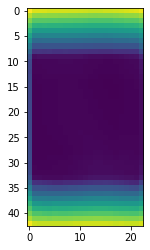

In [15]:
import cv2
import numpy as np
import imutils
import pytesseract

img = cv2.imread('/home/vimal/Documents/table_detect_samples/structured images/input/0101439000/cells/003-000.png')
img = cv2.resize(img, (620,480))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grey scale
gray = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(gray, 30, 200) #Perform Edge detection

cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

# loop over our contours
for c in cnts:
                # approximate the contour
                peri = cv2.arcLength(c, True)
                approx = cv2.approxPolyDP(c, 0.018 * peri, True)
                # if our approximated contour has four points, then
                # we can assume that we have found our screen
                if len(approx) == 4:
                      screenCnt = approx
                      break

# Masking the part other than the number plate
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

# Now crop
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]
import matplotlib.pyplot as plt
plt.imshow(Cropped)

#Read the number plate
text = pytesseract.image_to_string(Cropped, config='--psm 11')
print("Detected Number is:",text)

In [17]:
text = pytesseract.image_to_string(Cropped, config='--psm 3')
print(text)

In [28]:
image_name = "/home/vimal/Documents/table_detect_samples/structured images/input/0101439000/cells/011-002.png" # or whatever appropriate
text = pytesseract.image_to_string(Image.open(image_name), lang='eng', config='--psm 7')
print(text)

R



recognition: ¢



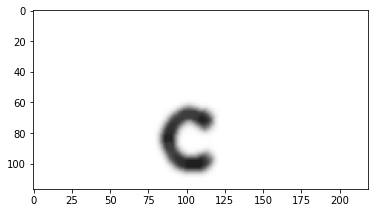

In [9]:
import cv2
import matplotlib.pyplot as plt
import pytesseract

img = '/home/vimal/Documents/table_detect_samples/structured images/input/0101439000/cells/002-002.png'
img = cv2.imread(img)
retval, img = cv2.threshold(img,200,255, cv2.THRESH_BINARY)

img = cv2.resize(img,(0,0),fx=3,fy=3)
img = cv2.GaussianBlur(img,(11,11),0)
img = cv2.medianBlur(img,9)
plt.imshow(img)
#cv2.imshow('asd',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
txt = pytesseract.image_to_string(img,config='--psm 6')
print('recognition:', txt)

In [5]:
import cv2
import numpy as np

In [9]:
def sort_contours(cnts, method="left-to-right"):
        # initialize the reverse flag and sort index
        reverse = False
        i = 0

        # handle if we need to sort in reverse
        if method == "right-to-left" or method == "bottom-to-top":
                reverse = True

        # handle if we are sorting against the y-coordinate rather than
        # the x-coordinate of the bounding box
        if method == "top-to-bottom" or method == "bottom-to-top":
                i = 1

        # construct the list of bounding boxes and sort them from top to
        # bottom
        boundingBoxes = [cv2.boundingRect(c) for c in cnts]
        (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                key=lambda b:b[1][i], reverse=reverse))

        # return the list of sorted contours and bounding boxes
        return (cnts, boundingBoxes)

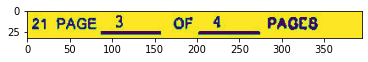

In [11]:
        img = cv2.imread('/home/vimal/Documents/table_detect_samples/structured images/input/in/0101439000.jpeg', 0)# Read the image
        (thresh, img_bin) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)#Thresholding the image
        img_bin = 255-img_bin# Invert the image
        #cv2.imwrite("inter_processing/Image_bin.jpg",img_bin)

        # Defining a kernel length
        kernel_length = np.array(img).shape[1]//40

        # A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
        verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))

        # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
        hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))

        # A kernel of (3 X 3) ones.
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

        # Morphological operation to detect verticle lines from an image
        img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
        verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
        #cv2.imwrite("inter_processing/verticle_lines.jpg",verticle_lines_img)

        ## Morphological operation to detect horizontal lines from an image
        img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
        horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
        #cv2.imwrite("inter_processing/horizontal_lines.jpg",horizontal_lines_img)

        # Weighting parameters, this will decide the quantity of an image to be added to make a new image.
        alpha = 0.5
        beta = 1.0 - alpha

        # This function helps to add two image with specific weight parameter to get a third image as summation of two image.
        img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
        img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
        (thresh, img_final_bin) = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        # For Debugging
        # Enable this line to see verticle and horizontal lines in the image which is used to find boxes
        #cv2.imwrite("inter_processing/img_final_bin.jpg",img_final_bin)

        # Find contours for image, which will detect all the boxes
        contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # Sort all the contours by top to bottom.
        (contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")
        idx = 0
        for c in contours:
                # Returns the location and width,height for every contour
                x, y, w, h = cv2.boundingRect(c)

                # If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.
                if (w > 80 and h > 20) and w > 3*h:
                        idx += 1
                        new_img = img[y:y+h, x:x+w]
                        #cv2.imwrite(cropped_dir_path+str(idx) + '.png', new_img)
        import matplotlib.pyplot as plt
        plt.imshow(new_img)

In [23]:
import os
def find_tables(image):
    BLUR_KERNEL_SIZE = (17, 17)
    STD_DEV_X_DIRECTION = 0
    STD_DEV_Y_DIRECTION = 0
    blurred = cv2.GaussianBlur(image, BLUR_KERNEL_SIZE, STD_DEV_X_DIRECTION, STD_DEV_Y_DIRECTION)
    MAX_COLOR_VAL = 255
    BLOCK_SIZE = 15
    SUBTRACT_FROM_MEAN = -2
    
    img_bin = cv2.adaptiveThreshold(
        ~blurred,
        MAX_COLOR_VAL,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        BLOCK_SIZE,
        SUBTRACT_FROM_MEAN,
    )
    vertical = horizontal = img_bin.copy()
    SCALE = 5
    image_width, image_height = horizontal.shape
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(image_width / SCALE), 1))
    horizontally_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(image_height / SCALE)))
    vertically_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)
    
    horizontally_dilated = cv2.dilate(horizontally_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1)))
    vertically_dilated = cv2.dilate(vertically_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (1, 60)))
    
    mask = horizontally_dilated + vertically_dilated
    contours, heirarchy = cv2.findContours(
        mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE,
    )

    MIN_TABLE_AREA = 1e5
    contours = [c for c in contours if cv2.contourArea(c) > MIN_TABLE_AREA]
    perimeter_lengths = [cv2.arcLength(c, True) for c in contours]
    epsilons = [0.1 * p for p in perimeter_lengths]
    approx_polys = [cv2.approxPolyDP(c, e, True) for c, e in zip(contours, epsilons)]
    bounding_rects = [cv2.boundingRect(a) for a in approx_polys]

    # The link where a lot of this code was borrowed from recommends an
    # additional step to check the number of "joints" inside this bounding rectangle.
    # A table should have a lot of intersections. We might have a rectangular image
    # here though which would only have 4 intersections, 1 at each corner.
    # Leaving that step as a future TODO if it is ever necessary.
    images = [image[y:y+h, x:x+w] for x, y, w, h in bounding_rects]
    return images

def main(files):
    #file_path = '/home/vimal/Documents/table_detect_samples/pre'
    #files = os.listdir(file_path)
    #results = []
    #for f in files:
    directory, filename = os.path.split(files)
    #image = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
    image = cv2.imread(files,0)
    tables = find_tables(image)
    files = []
    filename_sans_extension = os.path.splitext(filename)[0]
    if tables:
        os.makedirs(os.path.join(directory, filename_sans_extension), exist_ok=True)
    for i, table in enumerate(tables):
        table_filename = "table-{:03d}.png".format(i)
        table_filepath = os.path.join(
            directory, filename_sans_extension, table_filename
        )
        files.append(table_filepath)
        #cv2.imwrite(table_filepath, table)
    if tables:
        results.append((f, files))
    plt.imshow(table)
# Results is [[<input image>, [<images of detected tables>]]]
    return results



SyntaxError: 'return' outside function (<ipython-input-23-cc90f7400b6b>, line 74)

In [22]:
import os
import numpy as np

def find_tables(image):
    BLUR_KERNEL_SIZE = (17, 17)
    STD_DEV_X_DIRECTION = 0
    STD_DEV_Y_DIRECTION = 0
    blurred = cv2.GaussianBlur(image, BLUR_KERNEL_SIZE, STD_DEV_X_DIRECTION, STD_DEV_Y_DIRECTION)
    MAX_COLOR_VAL = 255
    BLOCK_SIZE = 15
    SUBTRACT_FROM_MEAN = -2
    
    img_bin = cv2.adaptiveThreshold(
        ~blurred,
        MAX_COLOR_VAL,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        BLOCK_SIZE,
        SUBTRACT_FROM_MEAN,
    )
    vertical = horizontal = img_bin.copy()
    SCALE = 5
    image_width, image_height = horizontal.shape
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(image_width / SCALE), 1))
    horizontally_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(image_height / SCALE)))
    vertically_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)
    
    horizontally_dilated = cv2.dilate(horizontally_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1)))
    vertically_dilated = cv2.dilate(vertically_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (1, 60)))
    
    mask = horizontally_dilated + vertically_dilated
    contours, heirarchy = cv2.findContours(
        mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE,
    )

    MIN_TABLE_AREA = 1e5
    contours = [c for c in contours if cv2.contourArea(c) > MIN_TABLE_AREA]
    perimeter_lengths = [cv2.arcLength(c, True) for c in contours]
    epsilons = [0.1 * p for p in perimeter_lengths]
    approx_polys = [cv2.approxPolyDP(c, e, True) for c, e in zip(contours, epsilons)]
    bounding_rects = [cv2.boundingRect(a) for a in approx_polys]

    # The link where a lot of this code was borrowed from recommends an
    # additional step to check the number of "joints" inside this bounding rectangle.
    # A table should have a lot of intersections. We might have a rectangular image
    # here though which would only have 4 intersections, 1 at each corner.
    # Leaving that step as a future TODO if it is ever necessary.
    images = [image[y:y+h, x:x+w] for x, y, w, h in bounding_rects]
    return images

def main(files):
    file_path = '/home/vimal/Documents/table_detect_samples/pre/test'
    files = os.listdir(file_path)
    results = []
    for f in files:
        directory, filename = os.path.split(f)
        #image = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
        image = cv2.imread(os.path.join(file_path,f),0)
        tables = find_tables(image)
        files = []
        filename_sans_extension = os.path.splitext(filename)[0]
        if tables:
            os.makedirs(os.path.join(directory, filename_sans_extension), exist_ok=True)
        for i, table in enumerate(tables):
            table_filename = "table-{:03d}.png".format(i)
            table_filepath = os.path.join(
                directory, filename_sans_extension, table_filename
            )
            files.append(table_filepath)
            cv2.imwrite(table_filepath, table)
        if tables:
            results.append((f, files))
    # Results is [[<input image>, [<images of detected tables>]]]
    return results



In [23]:
files = '/home/vimal/Documents/table_detect_samples/pre/test'
main(files)

[('0782492000.jpeg', ['0782492000/table-000.png'])]

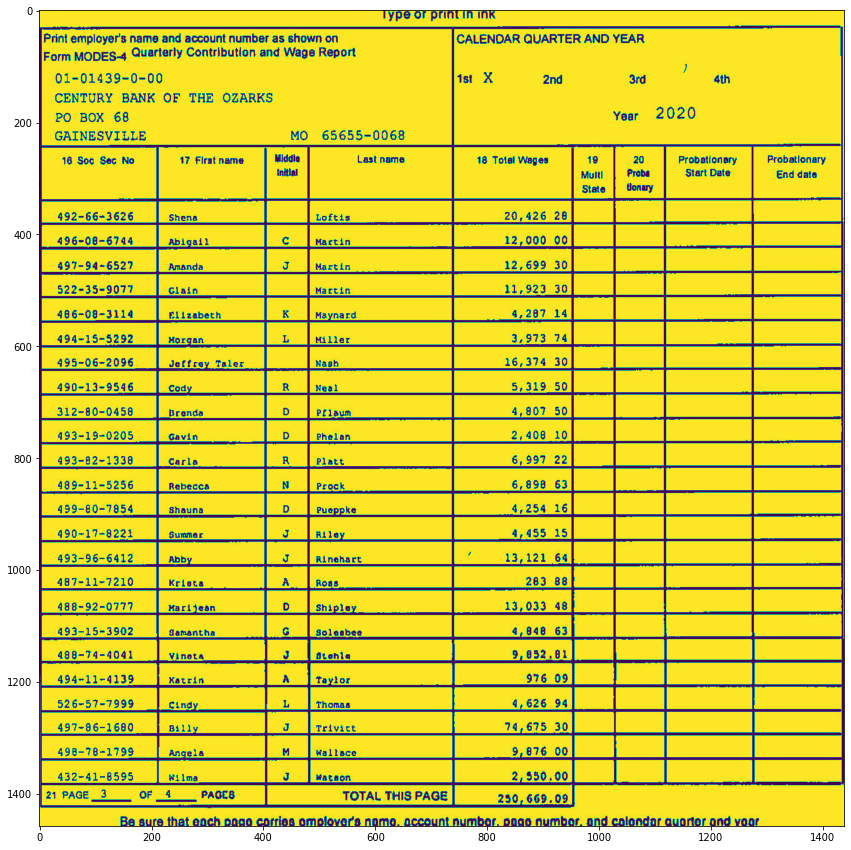

In [26]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  
# Read Images
img = mpimg.imread('/home/vimal/Documents/table_detect_samples/structured images/input/in/table-000.jpeg')

plt.figure(figsize=(15,15))
# Output Images
plt.imshow(img)

In [27]:
import cv2
import os

def extract_cell_images_from_table(image):
    BLUR_KERNEL_SIZE = (17, 17)
    STD_DEV_X_DIRECTION = 0
    STD_DEV_Y_DIRECTION = 0
    blurred = cv2.GaussianBlur(image, BLUR_KERNEL_SIZE, STD_DEV_X_DIRECTION, STD_DEV_Y_DIRECTION)
    MAX_COLOR_VAL = 255
    BLOCK_SIZE = 15
    SUBTRACT_FROM_MEAN = -2
    
    img_bin = cv2.adaptiveThreshold(
        ~blurred,
        MAX_COLOR_VAL,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        BLOCK_SIZE,
        SUBTRACT_FROM_MEAN,
    )
    vertical = horizontal = img_bin.copy()
    SCALE = 5
    image_width, image_height = horizontal.shape
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(image_width / SCALE), 1))
    horizontally_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(image_height / SCALE)))
    vertically_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)
    
    horizontally_dilated = cv2.dilate(horizontally_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1)))
    vertically_dilated = cv2.dilate(vertically_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (1, 60)))
    
    mask = horizontally_dilated + vertically_dilated
    contours, heirarchy = cv2.findContours(
        mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE,
    )
    
    perimeter_lengths = [cv2.arcLength(c, True) for c in contours]
    epsilons = [0.05 * p for p in perimeter_lengths]
    approx_polys = [cv2.approxPolyDP(c, e, True) for c, e in zip(contours, epsilons)]
    
    # Filter out contours that aren't rectangular. Those that aren't rectangular
    # are probably noise.
    approx_rects = [p for p in approx_polys if len(p) == 4]
    bounding_rects = [cv2.boundingRect(a) for a in approx_polys]
    
    # Filter out rectangles that are too narrow or too short.
    MIN_RECT_WIDTH = 40
    MIN_RECT_HEIGHT = 10
    bounding_rects = [
        r for r in bounding_rects if MIN_RECT_WIDTH < r[2] and MIN_RECT_HEIGHT < r[3]
    ]
    
    # The largest bounding rectangle is assumed to be the entire table.
    # Remove it from the list. We don't want to accidentally try to OCR
    # the entire table.
    largest_rect = max(bounding_rects, key=lambda r: r[2] * r[3])
    bounding_rects = [b for b in bounding_rects if b is not largest_rect]
    
    cells = [c for c in bounding_rects]
    def cell_in_same_row(c1, c2):
        c1_center = c1[1] + c1[3] - c1[3] / 2
        c2_bottom = c2[1] + c2[3]
        c2_top = c2[1]
        return c2_top < c1_center < c2_bottom
    
    orig_cells = [c for c in cells]
    rows = []
    while cells:
        first = cells[0]
        rest = cells[1:]
        cells_in_same_row = sorted(
            [
                c for c in rest
                if cell_in_same_row(c, first)
            ],
            key=lambda c: c[0]
        )
    
        row_cells = sorted([first] + cells_in_same_row, key=lambda c: c[0])
        rows.append(row_cells)
        cells = [
            c for c in rest
            if not cell_in_same_row(c, first)
        ]
    
    # Sort rows by average height of their center.
    def avg_height_of_center(row):
        centers = [y + h - h / 2 for x, y, w, h in row]
        return sum(centers) / len(centers)
    
    rows.sort(key=avg_height_of_center)
    cell_images_rows = []
    for row in rows:
        cell_images_row = []
        for x, y, w, h in row:
            cell_images_row.append(image[y:y+h, x:x+w])
        cell_images_rows.append(cell_images_row)
    return cell_images_rows

def main(f):
    results = []
    directory, filename = os.path.split(f)
    table = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
    rows = extract_cell_images_from_table(table)
    cell_img_dir = os.path.join(directory, "cells")
    os.makedirs(cell_img_dir, exist_ok=True)
    out_path = '/home/vimal/Documents/table_detect_samples/structured images/input/table-000/cells'
    paths = []
    for i, row in enumerate(rows):
        for j, cell in enumerate(row):
            cell_filename = "{:03d}-{:03d}.png".format(i, j)
            path = os.path.join(out_path, cell_filename)
            cv2.imwrite(path, cell)
            paths.append(path)
    return paths

f = '/home/vimal/Documents/table_detect_samples/structured images/input/in/table-000.jpeg'

main(f)

['/home/vimal/Documents/table_detect_samples/structured images/input/table-000/cells/000-000.png',
 '/home/vimal/Documents/table_detect_samples/structured images/input/table-000/cells/000-001.png',
 '/home/vimal/Documents/table_detect_samples/structured images/input/table-000/cells/001-000.png',
 '/home/vimal/Documents/table_detect_samples/structured images/input/table-000/cells/001-001.png',
 '/home/vimal/Documents/table_detect_samples/structured images/input/table-000/cells/001-002.png',
 '/home/vimal/Documents/table_detect_samples/structured images/input/table-000/cells/001-003.png',
 '/home/vimal/Documents/table_detect_samples/structured images/input/table-000/cells/001-004.png',
 '/home/vimal/Documents/table_detect_samples/structured images/input/table-000/cells/001-005.png',
 '/home/vimal/Documents/table_detect_samples/structured images/input/table-000/cells/001-006.png',
 '/home/vimal/Documents/table_detect_samples/structured images/input/table-000/cells/001-007.png',
 '/home/vi

In [4]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import xlsxwriter

try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

file=r'/home/vimal/Documents/python/Table Extraction/Table-OCR/0113647000/table-000.png'
img = cv2.imread(file,0)
img.shape

thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)
img_bin = 255-img_bin
#cv2.imwrite('/home/vimal/Documents/table_detect_samples/opt/0782492000_grey.jpeg',img_bin)

kernel_len = np.array(img).shape[1]//100
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)

image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)

img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#cv2.imwrite("/home/vimal/Documents/table_detect_samples/opt/0782492000.jpeg", img_vh)

bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)

contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

contours, boundingBoxes = sort_contours(contours, method='top-to-bottom')
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
box = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
#plotting = plt.imshow(image,cmap='gray')
#plt.show()

row=[]
column=[]
j=0
for i in range(len(box)):
    if(i==0):
        column.append(box[i])
        previous=box[i]
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]
            if(i==len(box)-1):
                row.append(column)
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
#print(column)
#print(row)

countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]
center=np.array(center)
center.sort()

finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)
    
outer=[]
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=''
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2,   cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=1)

                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion, config='--psm 3')
                inner = inner +" "+ out
            outer.append(inner)
            
arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row),countcol))
#print(dataframe)

data = dataframe.style.set_properties(align="left")
data = data.data

data.columns = data.iloc[0]
data = data[1:]

#data.to_excel('output2.xlsx', engine='xlsxwriter') 
writer = pd.ExcelWriter('ooo.xlsx', engine='xlsxwriter')
data.to_excel(writer, sheet_name='Sheet1')
writer.save()

data



0           First\nName\n
 SSN\n
  Last\n_ Nome\n
 Middle\n' Knitial\n
  \
1                                                                         
2     Isabell\n
 468-21-5779 |\n
                                   
 
   
3        Thomas\n
 497-19-9474\n
                         Beauette\n
 
   
4        Edward\n
 343-94-7651\n
                       Berkheimer\n
 
   
5      Joshua\n
 496-04-3491 _\n
                          Blattel\n
 
   
6       Melinda\n
 §00-82-7463\n
                         i\Blecha\n
 
   
7        Anna\n
 __494-52-4195\n
                           Bovaer\n
 
   
8       Keri\n
 496-11-6006 __\n
                            Bover\n
 
   
9      | Le@Roy\n
 491-94-0506\n
                           Brown.\n
 
   
10     Rodney\n
 498-19-5113 |\n
                         Campbali\n
 
   
11    \n\n21 PAGE 1 OF 6 PAGES\n
                    TOTAL THIS PAGH\n
   

0   __20. Probationary\n
 19\nMultl-\nstate\n
 Total\nWages\n
  
1      End\nDate\n
 Start\nDate\n
 Check\nIf Yes |\n
           
2                                 
 
 
 
 1,237.75\n
           
3                                   
 
 
 
 151.72\n
           
4                                 
 
 
 
 1,369.21\n
           
5                                 
 
 
 
 2,753.49\n
           
6                                 
 
 
 
 4,418.29\n
           
7                                 
 
 
 
 1.160.87\n
           
8                       
 
    \n\n \n
 
 7,372.62\n
           
9                            
 
 
 
  \n\n6,166,24\n
           
10                                  
 
 
 
 722.46\n
           
11                                       25,352.56\n

In [5]:
data.shape

(11, 3)

In [8]:
data.columns

Index([' First\nName\n
 SSN\n
', ' Last\n_ Nome\n
 Middle\n' Knitial\n
',
       ' __20. Probationary\n
 19\nMultl-\nstate\n
 Total\nWages\n
'],
      dtype='object', name=0)

In [31]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import xlsxwriter

try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

file=r'/home/vimal/Documents/python/Table Extraction/Table-OCR/0782492000/table-000.png'
img = cv2.imread(file,0)
img.shape

thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)
img_bin = 255-img_bin
#cv2.imwrite('/home/vimal/Documents/table_detect_samples/opt/0782492000_grey.jpeg',img_bin)

kernel_len = np.array(img).shape[1]//100
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)

image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)

img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#cv2.imwrite("/home/vimal/Documents/table_detect_samples/opt/0782492000.jpeg", img_vh)

bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)

contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

contours, boundingBoxes = sort_contours(contours, method='top-to-bottom')
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
box = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
#plotting = plt.imshow(image,cmap='gray')
#plt.show()

row=[]
column=[]
j=0
for i in range(len(box)):
    if(i==0):
        column.append(box[i])
        previous=box[i]
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]
            if(i==len(box)-1):
                row.append(column)
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
#print(column)
#print(row)

countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]
center=np.array(center)
center.sort()

finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)
    
outer=[]
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=''
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2,   cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=1)

                
                out = pytesseract.image_to_string(erosion , config='--psm 6')
                #if(len(out)==0):
                    #out = pytesseract.image_to_string(erosion, config='--psm 6')
                #inner = inner +" "+ out
            outer.append(out)
            
arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row),countcol))
#print(dataframe)

data = dataframe.style.set_properties(align="left")
data = data.data
#data = data[1:]
#data.columns = data.iloc[0]
#data = data[1:]

#data.to_excel('output2.xlsx', engine='xlsxwriter') 
writer = pd.ExcelWriter('ooo.xlsx', engine='xlsxwriter')
data.to_excel(writer, sheet_name='Sheet1')
writer.save()

data



0                 1           2                 3  \
0      490-98-8332\n
         Joshua\n
       \T\n
          Claus\n
   
1      334-74-9882\n
         Tony |\n
       ID\n
         Colona\n
   
2    491-96-3738 —\n
       Joshua ~\n
           
        Davis ~\n
   
3      497-92-7656\n
         Donald\n
        B\n
          Dixon\n
   
4    490-76-9890 _\n
         John 7\n
       Po\n
       Duello ;\n
   
5      491-82-6337\n
        Steve /\n
      S I\n
      Fischer ;\n
   
6   498-90-7571 _.\n
      Shannon :\n
           
       [Freeman\n
   
7      322-74-1180\n
      Charles .\n
       Ww\n
  Hinterthuer |\n
   
8      493-96-3766\n
         Brad 7\n
     R <a\n
         House=\n
   
9    500-13-2520 |\n
         Easton\n
        i\n
        House _\n
   
10   487-11-0443 _\n
         Joseph\n
       Jo\n
         Hunt -\n
   
11   496-72-2315 ©\n
        William\n
           
    Jeffries —]\n
   
12   500-96-7340 |\n
        Melante\n
        A\n
      Johnson |\n
   
13     497-84-6357\n
         Robert\n
           
          Jones\n
   
14     491-88-7510\n
       Nathan a\n
       BC\n
        Lansing\n
   
15   489-86-2041 |\n
         Daniel\n
           
     Mcintyre |\n
   
16     486-92-6042\n
          Henry\n
  L ‘emi’\n
     Richardson\n
   
17     490-96-2508\n
         [David\n
           
         Scoles\n
   
18   492-98-5543 _\n
         Joseph\n
       Cc\n
    ‘Schumacher\n
   
19     499-64-7200\n
        Frank a\n
      E !\n
     Stempfle -\n
   
20     493-94-7830\n
  Christopher |\n
           
        Sweeney\n
   
21   498-90-6361 _\n
           Todd\n
       Ee\n
       Vernon |\n
   
22   498-80-0127 _\n
       Donald |\n
      L |\n
     Vollmer nt\n
   

                   4  
0     | _ $147 64\n
  
1     | $1,181 12\n
  
2     , $2,878 98\n
  
3       a $315 28\n
  
4      $10,843 20\n
  
5    _ $1,162 67,\n
  
6   } _ $3,561 82\n
  
7     — $4,881.35\n
  
8     . $4,466 11\n
  
9       $1,173 12\n
  
10        $139 64\n
  
11       $147 64.\n
  
12    J _ $104 73\n
  
13     _- $812 02\n
  
14   “3 $3,349 85\n
  
15    _ $6,453 67\n
  
16      _ $433 69\n
  
17      a $442 92\n
  
18  po $7,418.38:\n
  
19      — $406 01\n
  
20    a $2,293 83\n
  
21      . $139 64\n
  
22    _ $4,023 19\n

In [32]:
print(inner)

In [33]:
print(outer)

['490-98-8332\n\x0c', 'Joshua\n\x0c', '\\T\n\x0c', 'Claus\n\x0c', '| _ $147 64\n\x0c', '334-74-9882\n\x0c', 'Tony |\n\x0c', 'ID\n\x0c', 'Colona\n\x0c', '| $1,181 12\n\x0c', '491-96-3738 —\n\x0c', 'Joshua ~\n\x0c', '\x0c', 'Davis ~\n\x0c', ', $2,878 98\n\x0c', '497-92-7656\n\x0c', 'Donald\n\x0c', 'B\n\x0c', 'Dixon\n\x0c', 'a $315 28\n\x0c', '490-76-9890 _\n\x0c', 'John 7\n\x0c', 'Po\n\x0c', 'Duello ;\n\x0c', '$10,843 20\n\x0c', '491-82-6337\n\x0c', 'Steve /\n\x0c', 'S I\n\x0c', 'Fischer ;\n\x0c', '_ $1,162 67,\n\x0c', '498-90-7571 _.\n\x0c', 'Shannon :\n\x0c', '\x0c', '[Freeman\n\x0c', '} _ $3,561 82\n\x0c', '322-74-1180\n\x0c', 'Charles .\n\x0c', 'Ww\n\x0c', 'Hinterthuer |\n\x0c', '— $4,881.35\n\x0c', '493-96-3766\n\x0c', 'Brad 7\n\x0c', 'R <a\n\x0c', 'House=\n\x0c', '. $4,466 11\n\x0c', '500-13-2520 |\n\x0c', 'Easton\n\x0c', 'i\n\x0c', 'House _\n\x0c', '$1,173 12\n\x0c', '487-11-0443 _\n\x0c', 'Joseph\n\x0c', 'Jo\n\x0c', 'Hunt -\n\x0c', '$139 64\n\x0c', '496-72-2315 ©\n\x0c', 'William

In [13]:
data = data[1:]

In [14]:
data

0  1                                  2  \
1             18 Soc Sec No\n
      17 Firat name Middle\nInitlal\n
   
2               492-66-3626\n
                              Shena\n
   
3            _ 496-068-6744\n
                            Abigail\n
   
4               497-94-6527\n
                             Amanda\n
   
5               522-35-9077\n
                              Glain\n
   
6              486-089-3114\n
                          Elizabeth\n
   
7               494-15-5292\n
                             Morgan\n
   
8               495-06-2096\n
                    Jeffray Taler |\n
   
9               490-13-9546\n
                               Cody\n
   
10             312-680-0458\n
                           _ Brenda\n
   
11            493-19-0205__\n
                              Gavin\n
   
12              493-82-1338\n
                           _ Carla.\n
   
13            _ 489-11-5256\n
                            Rebecca\n
   
14             499-680-7854\n
                             Shauna\n
   
15              490-17-9221\n
                             Summer\n
   
16            493-96-6412 _\n
                               Abby\n
   
17              487-11-7210\n
                           Krigta |\n
   
18              498-92-0777\n
                           Marijean\n
   
19              493-15-3902\n
                           Samantha\n
   
20            _ 499-74-4041\n
                            _Vineta\n
   
21              494-11-4139\n
                           | Katrin\n
   
22              326-57-7999\n
                             _Cindy\n
   
23             497-986-1600\n
                              Billy\n
   
24             498-768-1799\n
                             Angela\n
   
25              432-41-8595\n
                             Wilma,\n
   
26   21 PAGE 3 OF 4 PAGES\n
 
                                     
   

                      3                                                  4  
1          Last name\n
    \n\nProbatlonary\nEnd date\n
 Probationary\n...  
2                   
 
                               
 
 
 
 20,426 28\n
  
3           Martin\n
 
                               
 
 
 
 12,000 00\n
  
4           Martin\n
 
                               
 
 
 
 12,699 30\n
  
5           Martin\n
 
                            
 
 
 |\n
 11,923 30\n
  
6          Maynard\n
 
                                
 
 
 
 4,287 14\n
  
7           Millar\n
 
                                
 
 
 
 3,973 74\n
  
8             Nash\n
 
                               
 
 
 
 16,374 30\n
  
9             Neal\n
 
                             
 
 
 |\n
 5,319 50\n
  
10          PElaum\n
 
                                
 
 
 
 4,807 50\n
  
11          Phelan\n
 
                                
 
 
 
 2,408 10\n
  
12           Platt\n
 
                                
 
 
 
 6,997 22\n
  
13           Prock\n
 
                                
 
 
 
 6,898 63\n
  
14         Pueppke\n
 
                                
 
 
 
 4,254 16\n
  
15           Rilay\n
 
                                
 
 
 
 4,455 15\n
  
16        Rinehart\n
 
                     
 
    \n\n \n
 
 13,121 64\n
  
17            Ross\n
 
                                  
 
 
 
 283 88\n
  
18       Shipley _\n
 
                            
 
 
  \n
 13,033 48\n
  
19                  
 
                                
 
 
 
 4,848 63\n
  
20         fitehia\n
 
                              
 
 
 
 9,652,861.\n
  
21          Taylor\n
 
                                 
 
 
 
 976 09.\n
  
22       Thomas\n
 L\n
                               
 
 
 
 4,626 94.\n
  
23         Trivict\n
 
                          \n
 
  \n
 
 74,675 30\n
  
24         Wallace\n
 
                             
 
 
 
 __ 9,876 60\n
  
25          Wataon\n
 
                                
 
 
 
 2,550.00\n
  
26   TOTAL THIS PAGE\n
                                      230,669.09\n

In [34]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

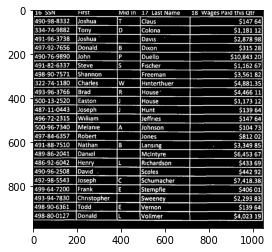

In [35]:
file=r'/home/vimal/Documents/python/Table Extraction/Table-OCR/0782492000/table-000.png'
img = cv2.imread(file,0)
img.shape
#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)
#inverting the image 
img_bin = 255-img_bin
#cv2.imwrite('/Users/YOURPATH/cv_inverted.png',img_bin)
#Plotting the image to see the output
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()

In [36]:
# Length(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

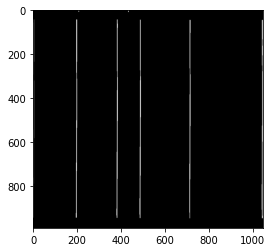

In [37]:
#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
#cv2.imwrite("/Users/YOURPATH/vertical.jpg",vertical_lines)
#Plot the generated image
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

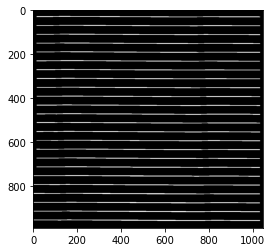

In [38]:
#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
#cv2.imwrite("/Users/YOURPATH/horizontal.jpg",horizontal_lines)
#Plot the generated image
plotting = plt.imshow(image_2,cmap='gray')
plt.show()

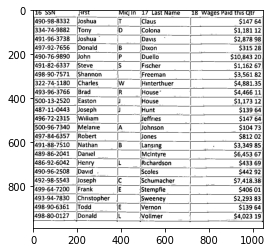

In [39]:
# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#cv2.imwrite("/Users/YOURPATH/img_vh.jpg", img_vh)
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)
#Plotting the generated image
plotting = plt.imshow(bitnot,cmap='gray')
plt.show()

In [40]:
# Detect contours for following box detection
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [43]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method='top-to-bottom')

In [44]:
#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
#Get mean of heights
mean = np.mean(heights)

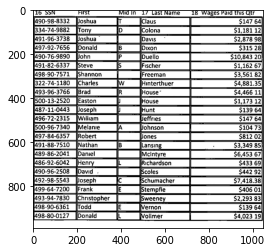

In [46]:
#Create list box to store all boxes in  
box = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
plotting = plt.imshow(image,cmap='gray')
plt.show()

In [50]:
row=[]
column=[]
j=0
#Sorting the boxes to their respective row and column
for i in range(len(box)):
    if(i==0):
        column.append(box[i])
        previous=box[i]
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]
            if(i==len(box)-1):
                row.append(column)
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
#print(column)
#print(row)

In [52]:
countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol
print(countcol)

5


In [54]:
center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]
center=np.array(center)
center.sort()
print(center)

[100 291 436 602 879]


In [57]:
finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)
#print(finalboxes)

In [60]:
outer=[]
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=''
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2,   cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=1)

                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion, config='--psm 3')
                inner = inner +" "+ out
            outer.append(inner)

In [62]:
#Creating a dataframe of the generated OCR list
arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row),countcol))
print(dataframe)
data = dataframe.style.set_properties(align="left")

                    0                  1       2                3  \
0      490-98-8332\n          Joshua\n                Claus\n   
1      334-74-9882\n            Tony\n               Colona\n   
2    491-96-3738 —\n        Joshua ~\n                Davis\n   
3      497-92-7656\n          Donald\n                Dixon\n   
4    490-76-9890 _\n            John\n               Duello\n   
5      491-82-6337\n           Steve\n              Fischer\n   
6      498-90-7571\n         Shannon\n              Freeman\n   
7      322-74-1180\n         Charles\n          Hinterthuer\n   
8      493-96-3766\n            Brad\n                House\n   
9    500-13-2520 |\n          Easton\n              House _\n   
10     487-11-0443\n          Joseph\n                 Hunt\n   
11     496-72-2315\n         William\n             leffries\n   
12   500-96-7340 |\n         Melante\n            Johnson |\n   
13     497-84-6357\n          Rob

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#image_path = imgfname
#image = cv2.imread(image_path)
image = cv2.imread('/home/vimal/Documents/python/Table Extraction/Table-OCR/0113647000/table-000.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

output = image.copy()
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
print(output.shape) # row (height) x column (width) x color (3)

image = preprocess_image(image)
(image, scale) = resize_image(image)
image = np.expand_dims(image, axis=0)

# detect objects in the input image and correct for the image scale
(boxes, scores, labels) = model.predict_on_batch(image)
boxes /= scale

confidence =  0.2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
label_out = []
result = ""

# loop over the detections
for (box, score, label) in zip(boxes[0], scores[0], labels[0]):
	# filter out weak detections
	if score < confidence:
		continue

	# convert the bounding box coordinates from floats to integers
	box = box.astype("int")

	# build the label and draw the label + bounding box on the output
	# image
	labeli = label
	label = "{}: {:.2f}".format(LABELS[label], score)
	print(label)
	
	if LABELS[labeli] not in label_out:
	    label_out.append(LABELS[labeli])
	    cv2.rectangle(output, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 12)
	    print(box[0])
	    print(box[1])
	    print(box[2])
	    print(box[3])
	    #result 		 
	    cv2.putText(output, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 4.5, (255, 1, 1), 12)
     	    
plt.figure(figsize=(20, 20))
plt.imshow(output)
plt.show()

(652, 1553, 3)


NameError: name 'preprocess_image' is not defined

In [4]:
import numpy as np
import sys
import cv2 as cv

In [8]:
argv = "/home/vimal/Documents/python/Table Extraction/Table-OCR/0113647000/table-000.png"
    # Load the image
src = cv.imread(argv, cv.IMREAD_COLOR)
    # Check if image is loaded fine
    
if src is None:
    print ('Error opening image: ' + argv)
    #return -1
    # Show source image
#cv.imshow("src", src)
    # [load_image]
    # [gray]
    # Transform source image to gray if it is not already
if len(src.shape) != 2:
    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
else:
    gray = src

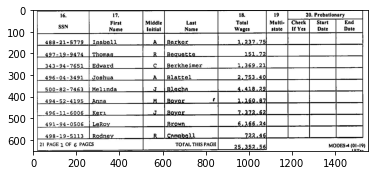

In [9]:
plt.imshow(src)

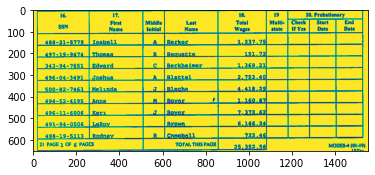

In [10]:
plt.imshow(gray)

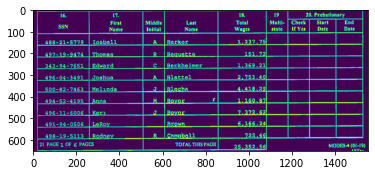

In [11]:
gray = cv.bitwise_not(gray)
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 15, -2)
    # Show binary image
    #show_wait_destroy("binary", bw)
plt.imshow(bw)

In [12]:
horizontal = np.copy(bw)
vertical = np.copy(bw)
    # [init]
    # [horiz]
    # Specify size on horizontal axis
cols = horizontal.shape[1]
horizontal_size = cols / 30
horizontal_size = int(horizontal_size)
    # Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))
    # Apply morphology operations
horizontal = cv.erode(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)
    # Show extracted horizontal lines

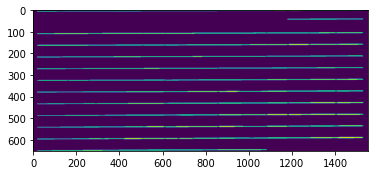

In [13]:
plt.imshow(horizontal)

In [14]:
rows = vertical.shape[0]
verticalsize = rows / 30
verticalsize = int (verticalsize)
    # Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
    # Apply morphology operations
vertical = cv.erode(vertical, verticalStructure)
vertical = cv.dilate(vertical, verticalStructure)
    # Show extracted vertical lines

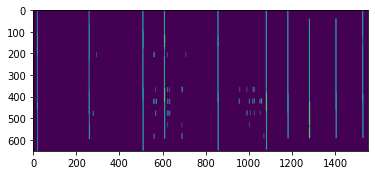

In [15]:
plt.imshow(vertical)

In [16]:
vertical = cv.bitwise_not(vertical)

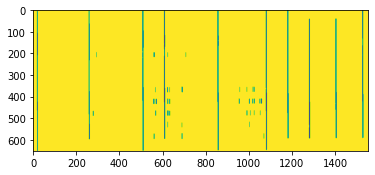

In [17]:
plt.imshow(vertical)

In [18]:
edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 3, -2)

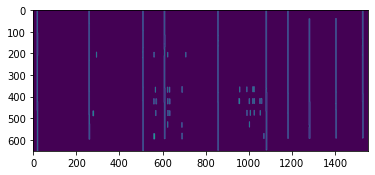

In [19]:
plt.imshow(edges)

In [20]:
kernel = np.ones((2, 2), np.uint8)
edges = cv.dilate(edges, kernel)

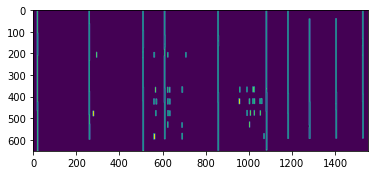

In [21]:
plt.imshow(edges)

In [22]:
 smooth = np.copy(vertical)
    # Step 4
smooth = cv.blur(smooth, (2, 2))
# Step 5
(rows, cols) = np.where(edges != 0)
vertical[rows, cols] = smooth[rows, cols]

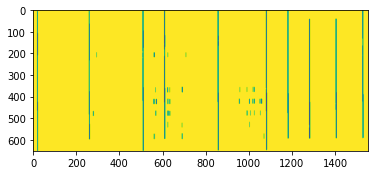

In [23]:
plt.imshow(vertical)

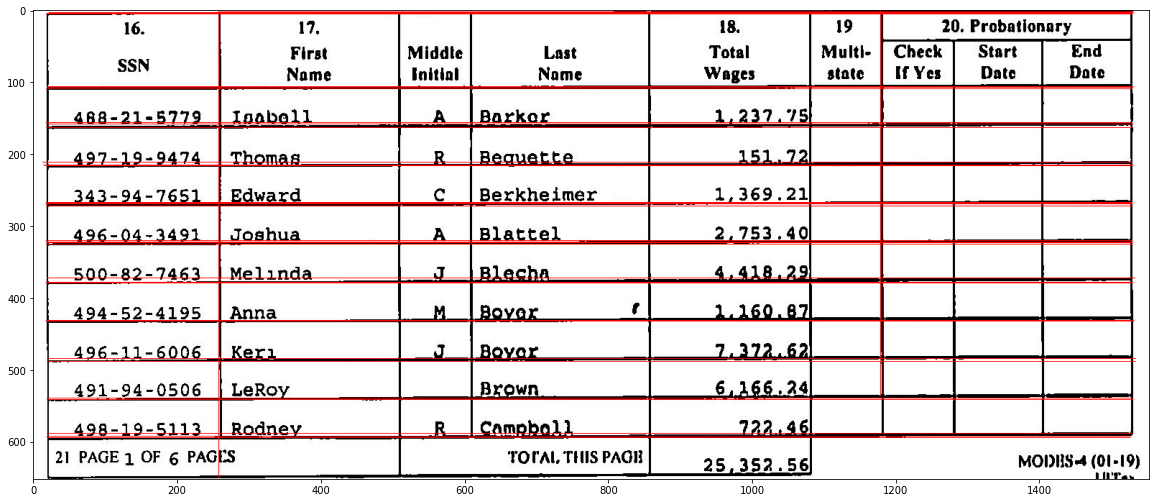

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image 
# Convert the image to gray-scale
img = cv2.imread('/home/vimal/Documents/python/Table Extraction/Table-OCR/0113647000/table-000.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Find the edges in the image using canny detector
edges = cv2.Canny(gray, 20, 1000)
# Detect points that form a line
#lines = cv2.HoughLinesP(edges, 1, np.pi/180, 2, minLineLength=5, maxLineGap=100)
lines = cv2.HoughLinesP(edges, 1, np.pi/20, 400, minLineLength=200, maxLineGap=800)
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 1)
# Show result
#cv2.imwrite("Result Image.jpg", img)
plt.figure(figsize=(20,20))
plt.imshow(img)

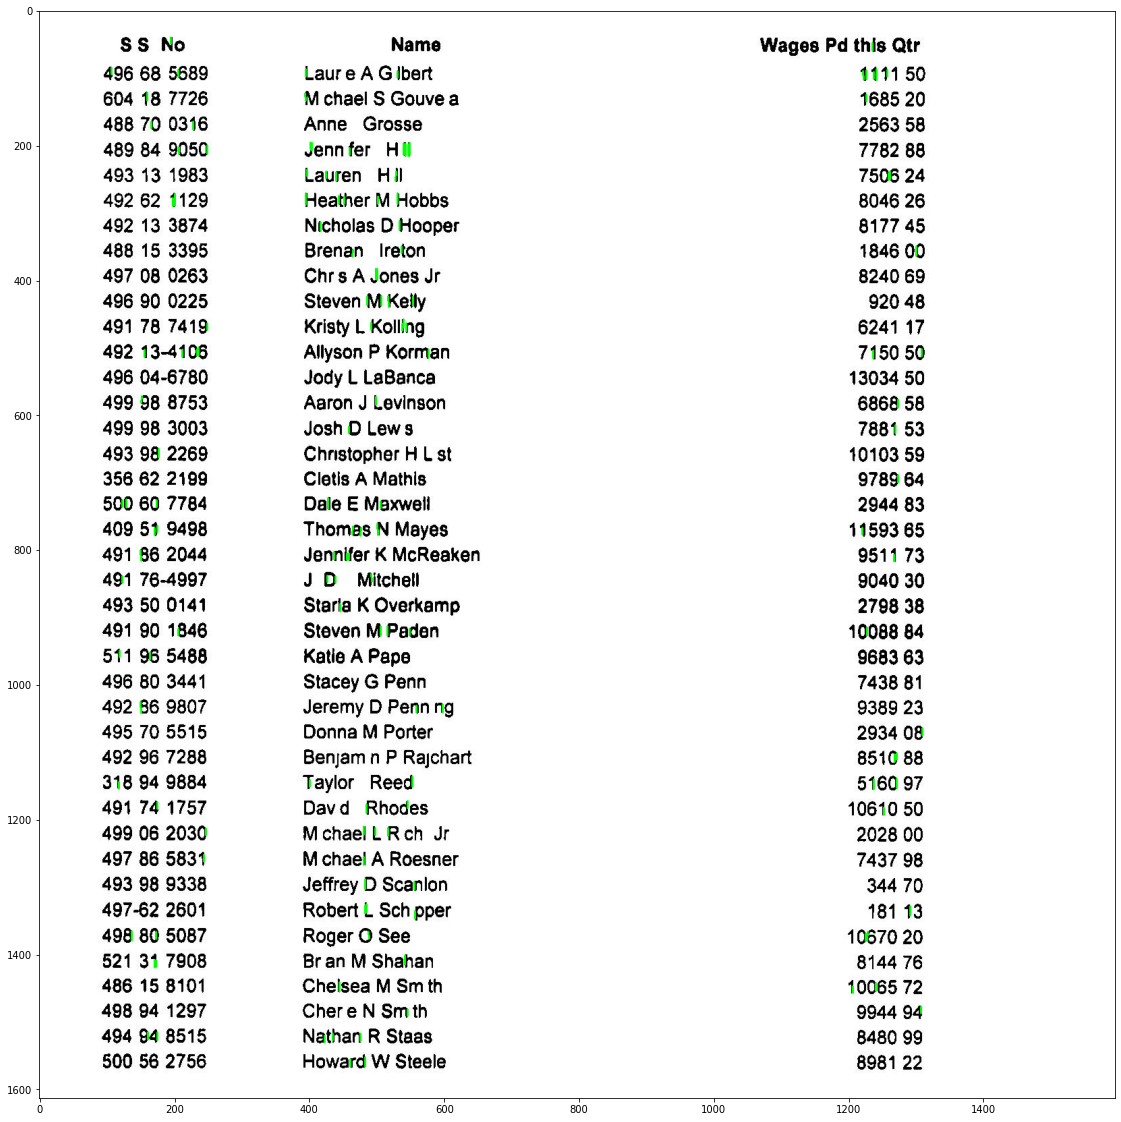

In [5]:
import cv2
import numpy as np

img = cv2.imread('/home/vimal/Documents/table_detect_samples/unstructured tables/crop_images/0404538000_crop.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
#cv2.imshow("image", edges)
#cv2.waitKey(0)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength, maxLineGap)
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.figure(figsize=(20,20))
plt.imshow(img)

2
Columns:  2
Roiws :  1


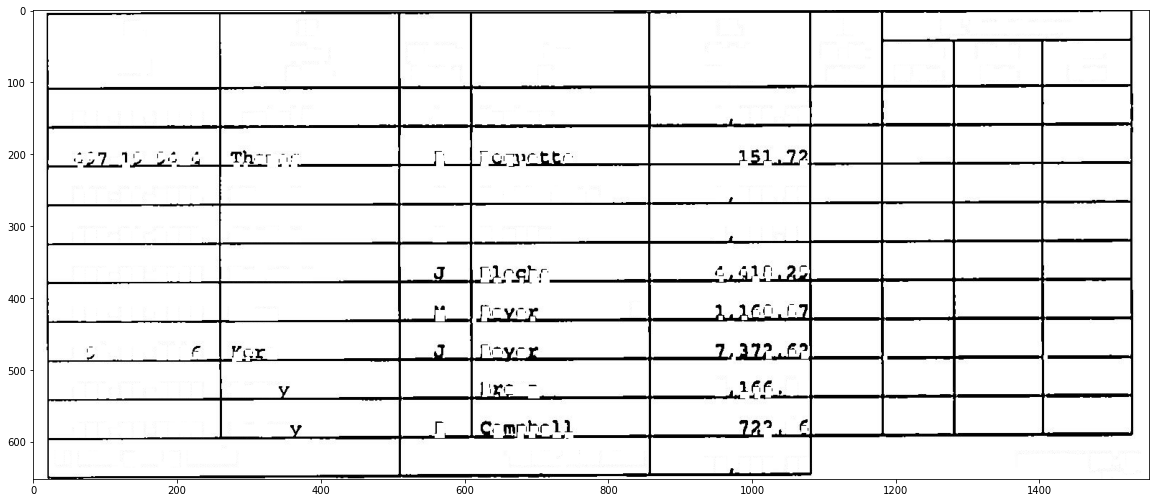

In [11]:
import cv2
import numpy as np

### MAKING TEMPLATE WITHOUT HOUGH

# Read the image and make a copy then transform it to gray colorspace,
# threshold the image and search for contours.
img = cv2.imread('/home/vimal/Documents/python/Table Extraction/Table-OCR/0113647000/table-000.png')
res = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

# Iterate through contours and draw a slightly bigger white rectangle
# over the contours that are not big enough (the text) on the copy of the image.
for i in contours:
    cnt = cv2.contourArea(i)
    if cnt < 500:
        x,y,w,h = cv2.boundingRect(i)
        cv2.rectangle(res,(x-1,y-1),(x+w+1,y+h+1),(255,255,255),-1)

# Display the result. Note that the image is allready the template!
#cv2.imshow('res', res)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Optional count the rows and columns of the table
count = res.copy()
gray = cv2.cvtColor(count, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

check = []
for i in contours:
    cnt = cv2.contourArea(i)
    if 10000 > cnt > 10:
        cv2.drawContours(count, [i], 0, (255,255,0), 2)
        M = cv2.moments(i)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        check.append([cx, cy])

check.sort(key = lambda xy: xy[1])
columns = 1

for i in range(0, len(check)-1):
    if check[i+1][1] + 5 >= check[i][1] >= check[i+1][1] - 5:
        columns += 1
    else:
        break
print(columns)

check.sort(key = lambda tup: tup[0])
rows = 1
for i in range(0, len(check)-1):
    if check[i+1][0] + 5 >= check[i][0] >= check[i+1][0] - 5:
        rows += 1
    else:
        break
print('Columns: ',columns)
print('Roiws : ',rows)

#cv2.imshow('res', count)
#cv2.waitKey(0)
#cv2.destroyAllWindows()



### LINES WITH HOUGHLINES()

# Convert the resulting image from previous step (no text) to gray colorspace.
res2 = img.copy()
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

# You can either use threshold or Canny edge for HoughLines().
_, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Perform HoughLines tranform.  
lines = cv2.HoughLines(thresh,1,np.pi/180,200)
for line in lines:
    for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))

            cv2.line(res2,(x1,y1),(x2,y2),(0,0,255),2)

#Display the result.
#cv2.imshow('res', res)
#cv2.imshow('res2', res2)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


### LINES WITH HOUGHLINESP()

# Convert the resulting image from first step (no text) to gray colorspace.
res3 = img.copy()
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

# Use Canny edge detection and dilate the edges for better result.
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
kernel = np.ones((4,4),np.uint8)
dilation = cv2.dilate(edges,kernel,iterations = 1)

# Perform HoughLinesP tranform.  
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(dilation, 1, np.pi / 180, 50, minLineLength, maxLineGap)
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(res3, (x1, y1), (x2, y2), (0, 255, 0), 2)

#Display the result.
#cv2.imwrite('h_res1.png', res)
#cv2.imwrite('h_res2.png', res2)
#cv2.imwrite('h_res3.png', res3)

#cv2.imshow('res', res)
#cv2.imshow('res2', res2)
#cv2.imshow('res3', res3)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.figure(figsize=(20,20))
plt.imshow(res)

In [12]:
img = cv2.imread('/home/vimal/Documents/python/Table Extraction/Table-OCR/0113647000/table-000.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
threshhold, threshhold_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
edges = cv2.Canny(threshhold_img, 150, 200, 3, 5)
lines = cv2.HoughLinesP(edges,1,np.pi/180,500, minLineLength = 600, maxLineGap = 75)[0].tolist()

for x1,y1,x2,y2 in lines:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),1)

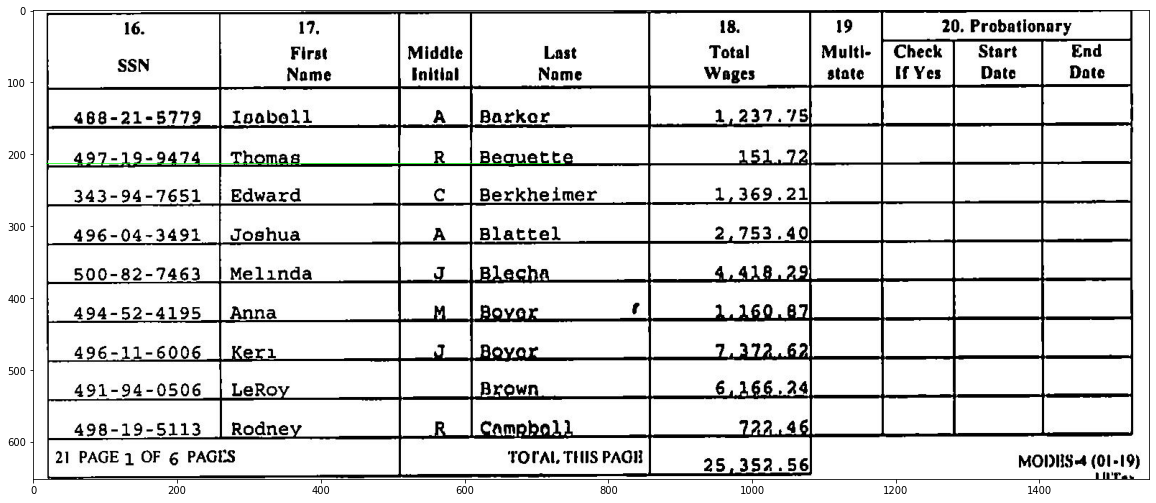

In [15]:
plt.figure(figsize=(20,20))
plt.imshow(cv2.line(img,(x1,y1),(x2,y2),(0,255,0),1))

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# The Hough Transform is a popular algorithm for detecting any shape that can
# be represented in a parametric mathmatical form in binary images. This
# usually means that images need to be thresholded or filtered prior to running
# the Hough Transform.

# read in shapes image and convert to grayscale
shapes = cv2.imread('/home/vimal/Documents/python/Table Extraction/Table-OCR/0113647000/table-000.png')
#cv2.imshow('Original Image', shapes)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
shapes_grayscale = cv2.cvtColor(shapes, cv2.COLOR_RGB2GRAY)

# blur image (this will help clean up noise for Canny Edge Detection)
# see Chapter 2.0 for Guassian Blur or check OpenCV documentation
shapes_blurred = cv2.GaussianBlur(shapes_grayscale, (5, 5), 1.5)

# find Canny Edges and show resulting image
canny_edges = cv2.Canny(shapes_blurred, 100, 200)
#cv2.imshow('Canny Edges', canny_edges)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
########################################### HOUGH LINES FROM SCRATCH USING NUMPY
# Step 1: The Hough transform needs a binary edges images.  For this particular
# python file, I used the openCV built in Class Canny to create this edge image
# from the original shapes.png file.

# This is the function that will build the Hough Accumulator for the given image
def hough_lines_acc(img, rho_resolution=1, theta_resolution=1):
    ''' A function for creating a Hough Accumulator for lines in an image. '''
    height, width = img.shape # we need heigth and width to calculate the diag
    img_diagonal = np.ceil(np.sqrt(height**2 + width**2)) # a**2 + b**2 = c**2
    rhos = np.arange(-img_diagonal, img_diagonal + 1, rho_resolution)
    thetas = np.deg2rad(np.arange(-90, 90, theta_resolution))

    # create the empty Hough Accumulator with dimensions equal to the size of
    # rhos and thetas
    H = np.zeros((len(rhos), len(thetas)), dtype=np.uint64)
    y_idxs, x_idxs = np.nonzero(img) # find all edge (nonzero) pixel indexes

    for i in range(len(x_idxs)): # cycle through edge points
        x = x_idxs[i]
        y = y_idxs[i]

        for j in range(len(thetas)): # cycle through thetas and calc rho
            rho = int((x * np.cos(thetas[j]) +
                       y * np.sin(thetas[j])) + img_diagonal)
            H[rho, j] += 1

    return H, rhos, thetas


# This is a simple peaks function that just finds the indicies of the number
# of maximum values equal to num_peaks.  You have to be careful here though, if
# there's any noise in the image it will like create a 'pocket' of local maxima
# values.  This function ignores this and in turn has the tendancy to return
# multiple lines along an actual line in the image.
def hough_simple_peaks(H, num_peaks):
    ''' A function that returns the number of indicies = num_peaks of the
        accumulator array H that correspond to local maxima. '''
    indices =  np.argpartition(H.flatten(), -2)[-num_peaks:]
    return np.vstack(np.unravel_index(indices, H.shape)).T


# This more advance Hough peaks funciton has threshold and nhood_size arguments
# threshold will threshold the peak values to be above this value if supplied,
# where as nhood_size will surpress the surrounding pixels centered around
# the local maximum after that value has been assigned as a peak.  This will
# force the algorithm to look eslwhere after it's already selected a point from
# a 'pocket' of local maxima.
def hough_peaks(H, num_peaks, threshold=0, nhood_size=3):
    ''' A function that returns the indicies of the accumulator array H that
        correspond to a local maxima.  If threshold is active all values less
        than this value will be ignored, if neighborhood_size is greater than
        (1, 1) this number of indicies around the maximum will be surpessed. '''
    # loop through number of peaks to identify
    indicies = []
    H1 = np.copy(H)
    for i in range(num_peaks):
        idx = np.argmax(H1) # find argmax in flattened array
        H1_idx = np.unravel_index(idx, H1.shape) # remap to shape of H
        indicies.append(H1_idx)

        # surpess indicies in neighborhood
        idx_y, idx_x = H1_idx # first separate x, y indexes from argmax(H)
        # if idx_x is too close to the edges choose appropriate values
        if (idx_x - (nhood_size/2)) < 0: min_x = 0
        else: min_x = idx_x - (nhood_size/2)
        if ((idx_x + (nhood_size/2) + 1) > H.shape[1]): max_x = H.shape[1]
        else: max_x = idx_x + (nhood_size/2) + 1

        # if idx_y is too close to the edges choose appropriate values
        if (idx_y - (nhood_size/2)) < 0: min_y = 0
        else: min_y = idx_y - (nhood_size/2)
        if ((idx_y + (nhood_size/2) + 1) > H.shape[0]): max_y = H.shape[0]
        else: max_y = idx_y + (nhood_size/2) + 1

        # bound each index by the neighborhood size and set all values to 0
        for x in range(min_x, max_x):
            for y in range(min_y, max_y):
                # remove neighborhoods in H1
                H1[y, x] = 0

                # highlight peaks in original H
                if (x == min_x or x == (max_x - 1)):
                    H[y, x] = 255
                if (y == min_y or y == (max_y - 1)):
                    H[y, x] = 255

    # return the indicies and the original Hough space with selected points
    return indicies, H


# a simple funciton used to plot a Hough Accumulator
def plot_hough_acc(H, plot_title='Hough Accumulator Plot'):
    ''' A function that plot a Hough Space using Matplotlib. '''
    fig = plt.figure(figsize=(10, 10))
    fig.canvas.set_window_title(plot_title)
    	
    plt.imshow(H, cmap='jet')

    plt.xlabel('Theta Direction'), plt.ylabel('Rho Direction')
    plt.tight_layout()
    plt.show()


# drawing the lines from the Hough Accumulatorlines using OpevCV cv2.line
def hough_lines_draw(img, indicies, rhos, thetas):
    ''' A function that takes indicies a rhos table and thetas table and draws
        lines on the input images that correspond to these values. '''
    for i in range(len(indicies)):
        # reverse engineer lines from rhos and thetas
        rho = rhos[indicies[i][0]]
        theta = thetas[indicies[i][1]]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        # these are then scaled so that the lines go off the edges of the image
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)


# run hough_lines_accumulator on the shapes canny_edges image
H, rhos, thetas = hough_lines_acc(canny_edges)
indicies, H = hough_peaks(H, 3, nhood_size=11) # find peaks
plot_hough_acc(H) # plot hough space, brighter spots have higher votes
hough_lines_draw(shapes, indicies, rhos, thetas)

# Show image with manual Hough Transform Lines
#cv2.imshow('Major Lines: Manual Hough Transform', shapes)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(shapes)

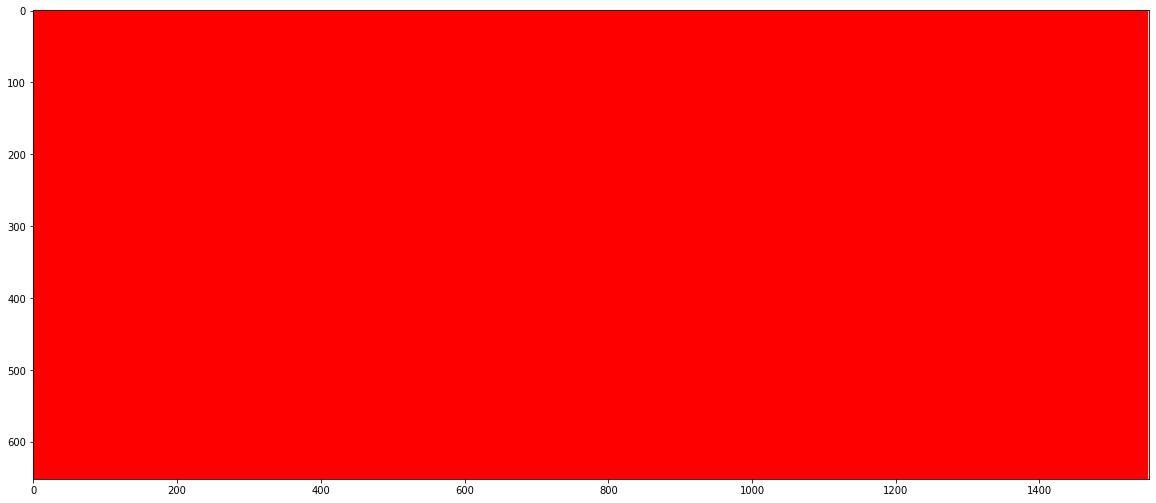

In [18]:
img = cv2.imread("/home/vimal/Documents/python/Table Extraction/Table-OCR/0113647000/table-000.png")

height, width, channels = img.shape
for x in range(0, width -1, 1):
     cv2.line(img, (x, 0), (x, height), (255, 0, 0), 1, 1)
plt.figure(figsize=(20,20))
plt.imshow(img)

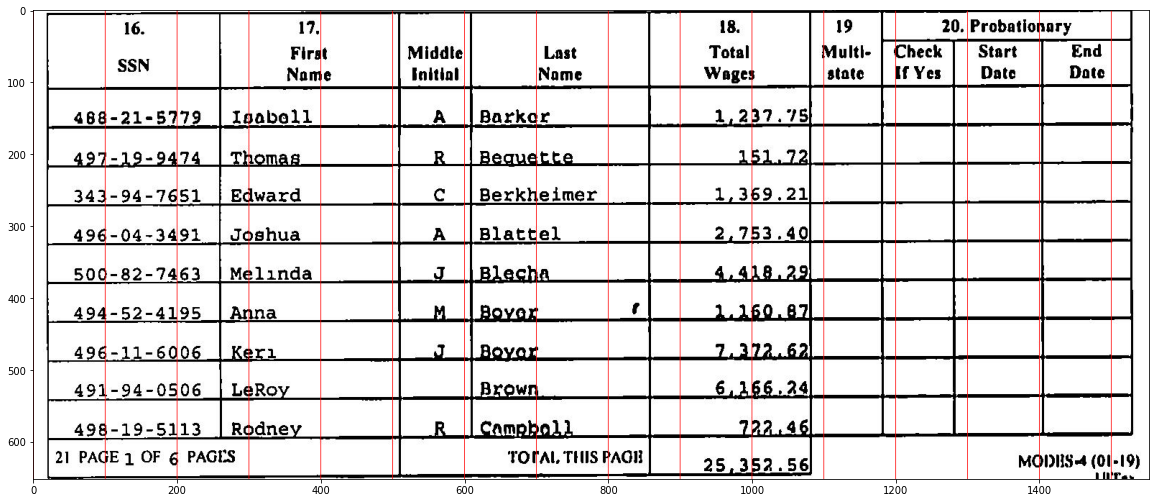

In [21]:
img = cv2.imread("/home/vimal/Documents/python/Table Extraction/Table-OCR/0113647000/table-000.png")
GRID_SIZE = 100

height, width, channels = img.shape
for x in range(0, width -1, GRID_SIZE):
     cv2.line(img, (x, 0), (x, height), (255, 0, 0), 1, 1)
plt.figure(figsize=(20,20))
plt.imshow(img)

In [23]:
pip install mss

     |████████████████████████████████| 76 kB 82 kB/s  eta 0:00:011
You should consider upgrading via the '/home/vimal/Documents/python/cde_venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:
import numpy as np

from mss import mss

import cv2

In [ ]:
while True:
    bounding_box = {'top': 70, 'left': 0, 'width': 740, 'height': 500}

In [1]:
bounding_box = {'top': 70, 'left': 0, 'width': 740, 'height': 500}



sct = mss()



sct_img = sct.grab(bounding_box)



img = np.array(sct_img)

line_color = (0, 255, 0)

thickness = 1

type_ = cv2.LINE_AA

pxstep = 25

x = pxstep

y = pxstep

NameError: name 'mss' is not defined

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

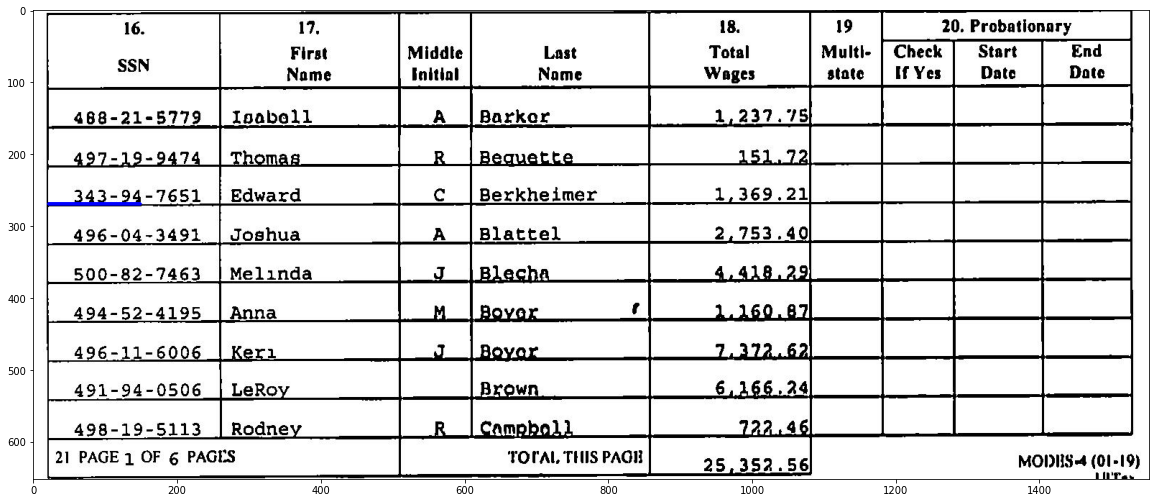

In [6]:
img = cv2.imread("/home/vimal/Documents/python/Table Extraction/Table-OCR/0113647000/table-000.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 80, 120)
lines = cv2.HoughLinesP(edges, 1, math.pi/2, 2, None, 30, 1);
for line in lines[0]:
    pt1 = (line[0],line[1])
    pt2 = (line[2],line[3])
    cv2.line(img, pt1, pt2, (0,0,255), 3)
plt.figure(figsize=(20,20))
plt.imshow(img)

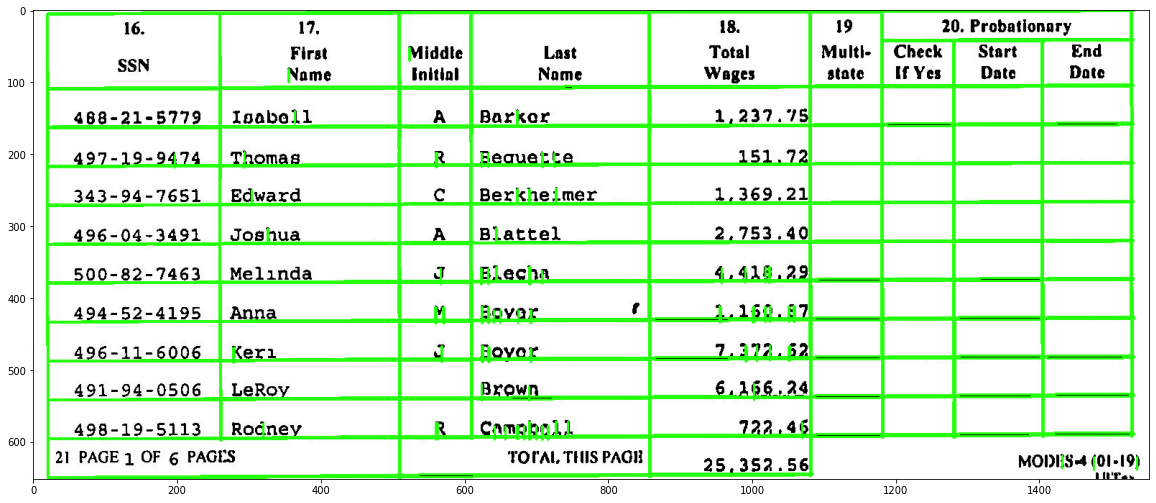

In [7]:
import cv2

# Load image, convert to grayscale, Otsu's threshold
image = cv2.imread('/home/vimal/Documents/python/Table Extraction/Table-OCR/0113647000/table-000.png')
result = image.copy()
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Detect horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (36,255,12), 2)

# Detect vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,10))
detect_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (36,255,12), 2)
plt.figure(figsize=(20,20))
plt.imshow(result)

0        1   2           3          4   5   6   7   8
0  497-19-9474   Thomas NaN   Beaueatte     151.72 NaN NaN NaN NaN
1  343-94-7651   Edward NaN  Berkheimer   1,369.21 NaN NaN NaN NaN
2  496-04-3491   Joshua NaN     Blattel   2,753.40 NaN NaN NaN NaN
3  §00-82-7463  Melinda NaN      Blecha   4,418.29 NaN NaN NaN NaN
4  494-52-4195     Anna NaN         NaN  1.160.487 NaN NaN NaN NaN
5  496-11-6006     Ker1 NaN       Bover   7,372.62 NaN NaN NaN NaN
6  491-94-0506      NaN NaN       Brown        NaN NaN NaN NaN NaN

<Figure size 1080x1080 with 0 Axes>

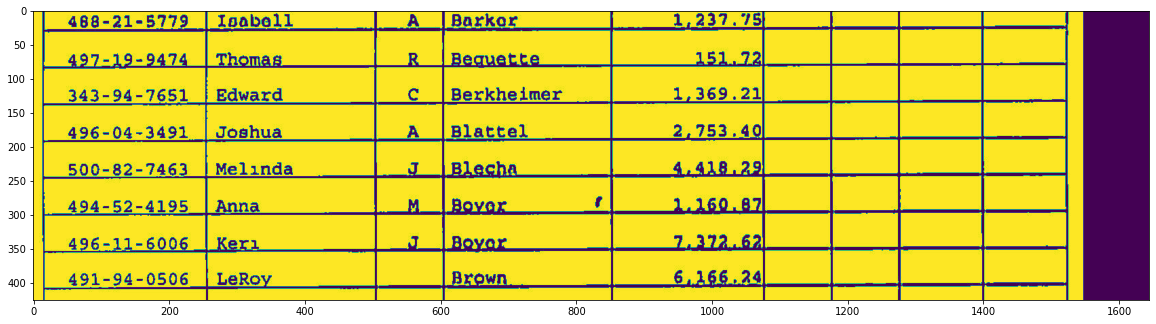

In [11]:
p = 'table-002.jpeg'

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
import math
import sys
import numpy as np
import pytesseract
import io 
import csv
import pandas as pd
import shutil, os

shutil.copytree('/home/vimal/Documents/table_detect_samples/structured images/input/sample', 
                os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input',
                             os.path.splitext(p)[0]))
  
# Read Images
#img = mpimg.imread('/home/vimal/Documents/table_detect_samples/structured images/input/in/0836849000.jpeg')
img = mpimg.imread(os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input/in',p))
plt.figure(figsize=(15,15))
# Output Images
#plt.imshow(img)

# Opens a image in RGB mode
#im = Image.open(r"/home/vimal/Documents/table_detect_samples/structured images/input/in",p)
#img = mpimg.imread(os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input/in',p))
im = Image.open(os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input/in',p))

#im =cv2.imread('/home/vimal/Documents/table_detect_samples/pre/0347682000.jpeg')
# Size of the image in pixels (size of orginal image)
# (This is not mandatory)
width, height = im.size
  
# Setting the points for cropped image
left = 5
top = height /4.9
right = 1650
bottom = 3 * height / 3.5
  
# Cropped image of above dimension
# (It will not change orginal image)
im1 = im.crop((left, top, right, bottom))
plt.figure(figsize=(20,20))
plt.imshow(im1)
#im1.save('/home/vimal/Documents/table_detect_samples/structured images/input/crop_images/0836849000_crop.jpeg')
#im1.save('/home/vimal/Documents/table_detect_samples/structured images/input/crop_images/0836849000_crop.jpeg')
b = os.path.splitext(p)[0]+'_crop.jpeg'
im1.save(os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input/crop_images',b))
# Shows the image in image viewer

def extract_cell_images_from_table(image):
    BLUR_KERNEL_SIZE = (17, 17)
    STD_DEV_X_DIRECTION = 0
    STD_DEV_Y_DIRECTION = 0
    blurred = cv2.GaussianBlur(image, BLUR_KERNEL_SIZE, STD_DEV_X_DIRECTION, STD_DEV_Y_DIRECTION)
    MAX_COLOR_VAL = 255
    BLOCK_SIZE = 15
    SUBTRACT_FROM_MEAN = -2
    
    img_bin = cv2.adaptiveThreshold(
        ~blurred,
        MAX_COLOR_VAL,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        BLOCK_SIZE,
        SUBTRACT_FROM_MEAN,
    )
    vertical = horizontal = img_bin.copy()
    SCALE = 5
    image_width, image_height = horizontal.shape
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(image_width / SCALE), 1))
    horizontally_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(image_height / SCALE)))
    vertically_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)
    
    horizontally_dilated = cv2.dilate(horizontally_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1)))
    vertically_dilated = cv2.dilate(vertically_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (1, 60)))
    
    mask = horizontally_dilated + vertically_dilated
    contours, heirarchy = cv2.findContours(
        mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE,
    )
    
    perimeter_lengths = [cv2.arcLength(c, True) for c in contours]
    epsilons = [0.05 * p for p in perimeter_lengths]
    approx_polys = [cv2.approxPolyDP(c, e, True) for c, e in zip(contours, epsilons)]
    
    # Filter out contours that aren't rectangular. Those that aren't rectangular
    # are probably noise.
    approx_rects = [p for p in approx_polys if len(p) == 4]
    bounding_rects = [cv2.boundingRect(a) for a in approx_polys]
    
    # Filter out rectangles that are too narrow or too short.
    MIN_RECT_WIDTH = 40
    MIN_RECT_HEIGHT = 10
    bounding_rects = [
        r for r in bounding_rects if MIN_RECT_WIDTH < r[2] and MIN_RECT_HEIGHT < r[3]
    ]
    
    # The largest bounding rectangle is assumed to be the entire table.
    # Remove it from the list. We don't want to accidentally try to OCR
    # the entire table.
    largest_rect = max(bounding_rects, key=lambda r: r[2] * r[3])
    bounding_rects = [b for b in bounding_rects if b is not largest_rect]
    
    cells = [c for c in bounding_rects]
    def cell_in_same_row(c1, c2):
        c1_center = c1[1] + c1[3] - c1[3] / 2
        c2_bottom = c2[1] + c2[3]
        c2_top = c2[1]
        return c2_top < c1_center < c2_bottom
    
    orig_cells = [c for c in cells]
    rows = []
    while cells:
        first = cells[0]
        rest = cells[1:]
        cells_in_same_row = sorted(
            [
                c for c in rest
                if cell_in_same_row(c, first)
            ],
            key=lambda c: c[0]
        )
    
        row_cells = sorted([first] + cells_in_same_row, key=lambda c: c[0])
        rows.append(row_cells)
        cells = [
            c for c in rest
            if not cell_in_same_row(c, first)
        ]
    
    # Sort rows by average height of their center.
    def avg_height_of_center(row):
        centers = [y + h - h / 2 for x, y, w, h in row]
        return sum(centers) / len(centers)
    
    rows.sort(key=avg_height_of_center)
    cell_images_rows = []
    for row in rows:
        cell_images_row = []
        for x, y, w, h in row:
            cell_images_row.append(image[y:y+h, x:x+w])
        cell_images_rows.append(cell_images_row)
    return cell_images_rows

def main(f):
    results = []
    directory, filename = os.path.split(f)
    table = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
    rows = extract_cell_images_from_table(table)
    cell_img_dir = os.path.join(directory, "cells")
    os.makedirs(cell_img_dir, exist_ok=True)
    out_path = os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input',
                            os.path.splitext(p)[0],'cells')
    paths = []
    for i, row in enumerate(rows):
        for j, cell in enumerate(row):
            cell_filename = "{:03d}-{:03d}.png".format(i, j)
            path = os.path.join(out_path, cell_filename)
            cv2.imwrite(path, cell)
            paths.append(path)
    return paths

f = os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input/crop_images',b)

main(f)

def main(image_file, tess_args):
    """
    OCR the image and output the text to a file with an extension that is ready
    to be used in Tesseract training (.gt.txt).
    Tries to crop the image so that only the relevant text gets passed to Tesseract.
    Returns the name of the text file that contains the text.
    """
    #file_path = '/home/vimal/Documents/table_detect_samples/structured images/input/011364700/cells'
    #image_file = os.listdir(file_path)
    
    for f in image_file:
        #print(f)
        directory, filename = os.path.split(f)
        filename_sans_ext, ext = os.path.splitext(filename)
        image = cv2.imread(os.path.join(file_path,f), cv2.IMREAD_GRAYSCALE)
        cropped = crop_to_text(image)
        #ocr_data_dir = os.path.join(directory, "ocr_data")
        #os.makedirs(ocr_data_dir, exist_ok=True)
        #out_imagepath = os.path.join(ocr_data_dir, filename)
        out_path = os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input',
                            os.path.splitext(p)[0],'text')
        out_txtpath = os.path.join(out_path, "{}.gt.txt".format(filename_sans_ext))
        #cv2.imwrite(out_imagepath, cropped)
        if not tess_args:
            d = os.path.dirname(sys.modules["table_ocr"].__file__)
            tessdata_dir = os.path.join(d, "tessdata")
            tess_args = ["--psm", "7", "-l", "table-ocr", "--tessdata-dir", tessdata_dir]
        txt = ocr_image(cropped, " ".join(tess_args))
        with open(out_txtpath, "w") as txt_file:
            txt_file.write(txt)
        #return out_txtpath
def crop_to_text(image):
    MAX_COLOR_VAL = 255
    BLOCK_SIZE = 15
    SUBTRACT_FROM_MEAN = -2

    img_bin = cv2.adaptiveThreshold(
        ~image,
        MAX_COLOR_VAL,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        BLOCK_SIZE,
        SUBTRACT_FROM_MEAN,
    )

    img_h, img_w = image.shape
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(img_w * 0.5), 1))
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(img_h * 0.7)))
    horizontal_lines = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
    vertical_lines = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)
    both = horizontal_lines + vertical_lines
    cleaned = img_bin - both

    # Get rid of little noise.
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    opened = cv2.morphologyEx(cleaned, cv2.MORPH_OPEN, kernel)
    opened = cv2.dilate(opened, kernel)

    contours, hierarchy = cv2.findContours(opened, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    bounding_rects = [cv2.boundingRect(c) for c in contours]
    NUM_PX_COMMA = 6
    MIN_CHAR_AREA = 5 * 9
    char_sized_bounding_rects = [(x, y, w, h) for x, y, w, h in bounding_rects if w * h > MIN_CHAR_AREA]
    if char_sized_bounding_rects:
        minx, miny, maxx, maxy = math.inf, math.inf, 0, 0
        for x, y, w, h in char_sized_bounding_rects:
            minx = min(minx, x)
            miny = min(miny, y)
            maxx = max(maxx, x + w)
            maxy = max(maxy, y + h)
        x, y, w, h = minx, miny, maxx - minx, maxy - miny
        cropped = image[y:min(img_h, y+h+NUM_PX_COMMA), x:min(img_w, x+w)]
    else:
        # If we morphed out all of the text, assume an empty image.
        cropped = MAX_COLOR_VAL * np.ones(shape=(20, 100), dtype=np.uint8)
    bordered = cv2.copyMakeBorder(cropped, 5, 5, 5, 5, cv2.BORDER_CONSTANT, None, 255)
    return bordered
def ocr_image(image, config):
    return pytesseract.image_to_string(
        image,
        config=config
    )

file_path = os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input',
                            os.path.splitext(p)[0],'cells')
image_file = os.listdir(file_path)
tess_args = os.listdir(file_path)

main(image_file, tess_args)

def text_files_to_csv(files):
    """Files must be sorted lexicographically
    Filenames must be <row>-<colum>.txt.
    000-000.txt
    000-001.txt
    001-000.txt
    etc...
    """
    rows = []
    for f in files:
        directory, filename = os.path.split(f)
        with open(os.path.join(file_path,f)) as of:
            txt = of.read().strip()
        row, column = map(int, filename.split(".")[0].split("-"))
        if row == len(rows):
            rows.append([])
        rows[row].append(txt)

    csv_file = io.StringIO()
    writer = csv.writer(csv_file)
    writer.writerows(rows)
    return csv_file.getvalue()

def main(files):
    return text_files_to_csv(files)


file_path = os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input',
                            os.path.splitext(p)[0],'text')
file = file = os.listdir(file_path)
files = sorted(file)

a = main(files)
#print(a)

c = os.path.splitext(p)[0]+'_text.txt'
cs = os.path.splitext(p)[0]+'_xl.csv'

text_file = open(os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input',
                            os.path.splitext(p)[0],'text_file',c), "wt")
n = text_file.write(a)
text_file.close()

df = pd.read_csv(os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input',
                            os.path.splitext(p)[0],'text_file',c),header=None)
#df = df.dropna(how='all', axis=1)
#df.columns = df.iloc[0]
#df = df[1:]
df.to_csv(os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input',
                            os.path.splitext(p)[0],'csv',cs), 
                  index = None)
df





In [43]:
def find_tables(image):
    BLUR_KERNEL_SIZE = (17, 17)
    STD_DEV_X_DIRECTION = 0
    STD_DEV_Y_DIRECTION = 0
    blurred = cv2.GaussianBlur(image, BLUR_KERNEL_SIZE, STD_DEV_X_DIRECTION, STD_DEV_Y_DIRECTION)
    MAX_COLOR_VAL = 255
    BLOCK_SIZE = 15
    SUBTRACT_FROM_MEAN = -2
    
    img_bin = cv2.adaptiveThreshold(
        ~blurred,
        MAX_COLOR_VAL,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        BLOCK_SIZE,
        SUBTRACT_FROM_MEAN,
    )
    vertical = horizontal = img_bin.copy()
    SCALE = 5
    image_width, image_height = horizontal.shape
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(image_width / SCALE), 1))
    horizontally_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(image_height / SCALE)))
    vertically_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)
    
    horizontally_dilated = cv2.dilate(horizontally_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1)))
    vertically_dilated = cv2.dilate(vertically_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (1, 60)))
    
    mask = horizontally_dilated + vertically_dilated
    contours, heirarchy = cv2.findContours(
        mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE,
    )

    MIN_TABLE_AREA = 1e5
    contours = [c for c in contours if cv2.contourArea(c) > MIN_TABLE_AREA]
    perimeter_lengths = [cv2.arcLength(c, True) for c in contours]
    epsilons = [0.1 * p for p in perimeter_lengths]
    approx_polys = [cv2.approxPolyDP(c, e, True) for c, e in zip(contours, epsilons)]
    bounding_rects = [cv2.boundingRect(a) for a in approx_polys]

    # The link where a lot of this code was borrowed from recommends an
    # additional step to check the number of "joints" inside this bounding rectangle.
    # A table should have a lot of intersections. We might have a rectangular image
    # here though which would only have 4 intersections, 1 at each corner.
    # Leaving that step as a future TODO if it is ever necessary.
    images = [image[y:y+h, x:x+w] for x, y, w, h in bounding_rects]
    return images

def main(files):
    file_path = '/home/vimal/Documents/table_detect_samples/pre/test/output'
    files = os.listdir(file_path)
    results = []
    for f in files:
        directory, filename = os.path.split(f)
        #image = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
        image = cv2.imread(os.path.join(file_path,f),0)
        tables = find_tables(image)
        files = []
        filename_sans_extension = os.path.splitext(filename)[0]
        if tables:
            os.makedirs(os.path.join(directory, filename_sans_extension), exist_ok=True)
        for i, table in enumerate(tables):
            table_filename = "table-{:03d}.png".format(i)
            table_filepath = os.path.join(
                directory, filename_sans_extension, table_filename
            )
            files.append(table_filepath)
            cv2.imwrite(table_filepath, table)
        if tables:
            results.append((f, files))
    # Results is [[<input image>, [<images of detected tables>]]]
    return results



In [44]:
file_path = '/home/vimal/Documents/table_detect_samples/pre/test/output'
files = os.listdir(file_path)

In [45]:
main(files)

[('0103841000.jpeg', ['0103841000/table-000.png']),
 ('0890280000.jpeg', ['0890280000/table-000.png'])]

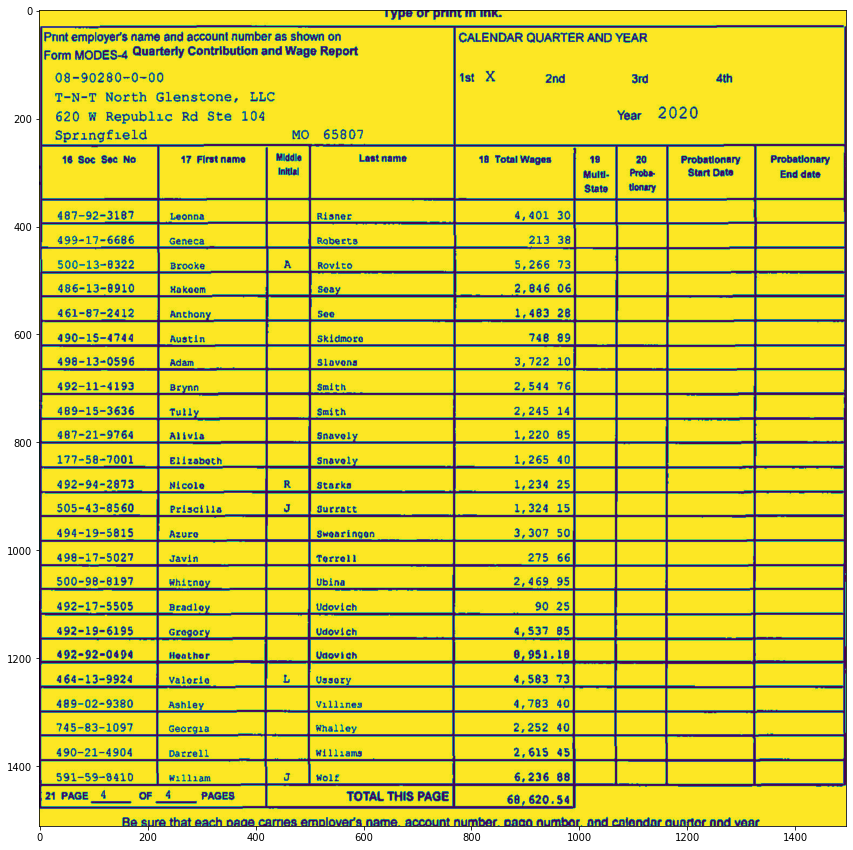

In [52]:
p = 'table-005.jpeg'

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
import math
import sys
import numpy as np
import pytesseract
import io 
import csv
import pandas as pd
import shutil, os

shutil.copytree('/home/vimal/Documents/table_detect_samples/structured images/input/sample', 
                os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input',
                             os.path.splitext(p)[0]))
  
# Read Images
#img = mpimg.imread('/home/vimal/Documents/table_detect_samples/structured images/input/in/0836849000.jpeg')
img = mpimg.imread(os.path.join('/home/vimal/Documents/table_detect_samples/structured images/input/in',p))
plt.figure(figsize=(15,15))
plt.imshow(img)

In [53]:
import cv2
import os

def extract_cell_images_from_table(image):
    BLUR_KERNEL_SIZE = (17, 17)
    STD_DEV_X_DIRECTION = 0
    STD_DEV_Y_DIRECTION = 0
    blurred = cv2.GaussianBlur(image, BLUR_KERNEL_SIZE, STD_DEV_X_DIRECTION, STD_DEV_Y_DIRECTION)
    MAX_COLOR_VAL = 255
    BLOCK_SIZE = 15
    SUBTRACT_FROM_MEAN = -2
    
    img_bin = cv2.adaptiveThreshold(
        ~blurred,
        MAX_COLOR_VAL,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        BLOCK_SIZE,
        SUBTRACT_FROM_MEAN,
    )
    vertical = horizontal = img_bin.copy()
    SCALE = 5
    image_width, image_height = horizontal.shape
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(image_width / SCALE), 1))
    horizontally_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(image_height / SCALE)))
    vertically_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)
    
    horizontally_dilated = cv2.dilate(horizontally_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1)))
    vertically_dilated = cv2.dilate(vertically_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (1, 60)))
    
    mask = horizontally_dilated + vertically_dilated
    contours, heirarchy = cv2.findContours(
        mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE,
    )
    
    perimeter_lengths = [cv2.arcLength(c, True) for c in contours]
    epsilons = [0.05 * p for p in perimeter_lengths]
    approx_polys = [cv2.approxPolyDP(c, e, True) for c, e in zip(contours, epsilons)]
    
    # Filter out contours that aren't rectangular. Those that aren't rectangular
    # are probably noise.
    approx_rects = [p for p in approx_polys if len(p) == 4]
    bounding_rects = [cv2.boundingRect(a) for a in approx_polys]
    
    # Filter out rectangles that are too narrow or too short.
    MIN_RECT_WIDTH = 40
    MIN_RECT_HEIGHT = 10
    bounding_rects = [
        r for r in bounding_rects if MIN_RECT_WIDTH < r[2] and MIN_RECT_HEIGHT < r[3]
    ]
    
    # The largest bounding rectangle is assumed to be the entire table.
    # Remove it from the list. We don't want to accidentally try to OCR
    # the entire table.
    largest_rect = max(bounding_rects, key=lambda r: r[2] * r[3])
    bounding_rects = [b for b in bounding_rects if b is not largest_rect]
    
    cells = [c for c in bounding_rects]
    def cell_in_same_row(c1, c2):
        c1_center = c1[1] + c1[3] - c1[3] / 2
        c2_bottom = c2[1] + c2[3]
        c2_top = c2[1]
        return c2_top < c1_center < c2_bottom
    
    orig_cells = [c for c in cells]
    rows = []
    while cells:
        first = cells[0]
        rest = cells[1:]
        cells_in_same_row = sorted(
            [
                c for c in rest
                if cell_in_same_row(c, first)
            ],
            key=lambda c: c[0]
        )
    
        row_cells = sorted([first] + cells_in_same_row, key=lambda c: c[0])
        rows.append(row_cells)
        cells = [
            c for c in rest
            if not cell_in_same_row(c, first)
        ]
    
    # Sort rows by average height of their center.
    def avg_height_of_center(row):
        centers = [y + h - h / 2 for x, y, w, h in row]
        return sum(centers) / len(centers)
    
    rows.sort(key=avg_height_of_center)
    cell_images_rows = []
    for row in rows:
        cell_images_row = []
        for x, y, w, h in row:
            cell_images_row.append(image[y:y+h, x:x+w])
        cell_images_rows.append(cell_images_row)
    return cell_images_rows

def main(f):
    results = []
    directory, filename = os.path.split(f)
    table = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
    rows = extract_cell_images_from_table(table)
    cell_img_dir = os.path.join(directory, "cells")
    os.makedirs(cell_img_dir, exist_ok=True)
    out_path = '/home/vimal/Documents/table_detect_samples/structured images/input/table-005/cells'
    paths = []
    for i, row in enumerate(rows):
        for j, cell in enumerate(row):
            cell_filename = "{:03d}-{:03d}.png".format(i, j)
            path = os.path.join(out_path, cell_filename)
            cv2.imwrite(path, cell)
            paths.append(path)
    return paths

f = '/home/vimal/Documents/table_detect_samples/structured images/input/in/table-005.jpeg'

main(f)

['/home/vimal/Documents/table_detect_samples/structured images/input/table-005/cells/000-000.png',
 '/home/vimal/Documents/table_detect_samples/structured images/input/table-005/cells/000-001.png',
 '/home/vimal/Documents/table_detect_samples/structured images/input/table-005/cells/001-000.png',
 '/home/vimal/Documents/table_detect_samples/structured images/input/table-005/cells/001-001.png',
 '/home/vimal/Documents/table_detect_samples/structured images/input/table-005/cells/001-002.png',
 '/home/vimal/Documents/table_detect_samples/structured images/input/table-005/cells/001-003.png',
 '/home/vimal/Documents/table_detect_samples/structured images/input/table-005/cells/001-004.png',
 '/home/vimal/Documents/table_detect_samples/structured images/input/table-005/cells/001-005.png',
 '/home/vimal/Documents/table_detect_samples/structured images/input/table-005/cells/001-006.png',
 '/home/vimal/Documents/table_detect_samples/structured images/input/table-005/cells/001-007.png',
 '/home/vi

In [54]:
import math
import os
import sys

import cv2
import numpy as np
import pytesseract

def main(image_file, tess_args):
    """
    OCR the image and output the text to a file with an extension that is ready
    to be used in Tesseract training (.gt.txt).
    Tries to crop the image so that only the relevant text gets passed to Tesseract.
    Returns the name of the text file that contains the text.
    """
    #file_path = '/home/vimal/Documents/table_detect_samples/structured images/input/011364700/cells'
    #image_file = os.listdir(file_path)
    
    for f in image_file:
        #print(f)
        directory, filename = os.path.split(f)
        filename_sans_ext, ext = os.path.splitext(filename)
        image = cv2.imread(os.path.join(file_path,f), cv2.IMREAD_GRAYSCALE)
        cropped = crop_to_text(image)
        #ocr_data_dir = os.path.join(directory, "ocr_data")
        #os.makedirs(ocr_data_dir, exist_ok=True)
        #out_imagepath = os.path.join(ocr_data_dir, filename)
        out_path = '/home/vimal/Documents/table_detect_samples/structured images/input/table-005/text'
        out_txtpath = os.path.join(out_path, "{}.gt.txt".format(filename_sans_ext))
        #cv2.imwrite(out_imagepath, cropped)
        if not tess_args:
            d = os.path.dirname(sys.modules["table_ocr"].__file__)
            tessdata_dir = os.path.join(d, "tessdata")
            tess_args = ["--psm", "7", "-l", "table-ocr", "--tessdata-dir", tessdata_dir]
        txt = ocr_image(cropped, " ".join(tess_args))
        with open(out_txtpath, "w") as txt_file:
            txt_file.write(txt)
        #return out_txtpath
def crop_to_text(image):
    MAX_COLOR_VAL = 255
    BLOCK_SIZE = 15
    SUBTRACT_FROM_MEAN = -2

    img_bin = cv2.adaptiveThreshold(
        ~image,
        MAX_COLOR_VAL,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        BLOCK_SIZE,
        SUBTRACT_FROM_MEAN,
    )

    img_h, img_w = image.shape
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(img_w * 0.5), 1))
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(img_h * 0.7)))
    horizontal_lines = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
    vertical_lines = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)
    both = horizontal_lines + vertical_lines
    cleaned = img_bin - both

    # Get rid of little noise.
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    opened = cv2.morphologyEx(cleaned, cv2.MORPH_OPEN, kernel)
    opened = cv2.dilate(opened, kernel)

    contours, hierarchy = cv2.findContours(opened, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    bounding_rects = [cv2.boundingRect(c) for c in contours]
    NUM_PX_COMMA = 6
    MIN_CHAR_AREA = 5 * 9
    char_sized_bounding_rects = [(x, y, w, h) for x, y, w, h in bounding_rects if w * h > MIN_CHAR_AREA]
    if char_sized_bounding_rects:
        minx, miny, maxx, maxy = math.inf, math.inf, 0, 0
        for x, y, w, h in char_sized_bounding_rects:
            minx = min(minx, x)
            miny = min(miny, y)
            maxx = max(maxx, x + w)
            maxy = max(maxy, y + h)
        x, y, w, h = minx, miny, maxx - minx, maxy - miny
        cropped = image[y:min(img_h, y+h+NUM_PX_COMMA), x:min(img_w, x+w)]
    else:
        # If we morphed out all of the text, assume an empty image.
        cropped = MAX_COLOR_VAL * np.ones(shape=(20, 100), dtype=np.uint8)
    bordered = cv2.copyMakeBorder(cropped, 5, 5, 5, 5, cv2.BORDER_CONSTANT, None, 255)
    return bordered
def ocr_image(image, config):
    return pytesseract.image_to_string(
        image,
        config='--psm 6'
    )

file_path = '/home/vimal/Documents/table_detect_samples/structured images/input/table-005/cells'
image_file = os.listdir(file_path)
tess_args = os.listdir(file_path)

main(image_file, tess_args)


In [55]:
import io 
import csv

def text_files_to_csv(files):
    """Files must be sorted lexicographically
    Filenames must be <row>-<colum>.txt.
    000-000.txt
    000-001.txt
    001-000.txt
    etc...
    """
    rows = []
    for f in files:
        directory, filename = os.path.split(f)
        with open(os.path.join(file_path,f)) as of:
            txt = of.read().strip()
        row, column = map(int, filename.split(".")[0].split("-"))
        if row == len(rows):
            rows.append([])
        rows[row].append(txt)

    csv_file = io.StringIO()
    writer = csv.writer(csv_file)
    writer.writerows(rows)
    return csv_file.getvalue()

def main(files):
    return text_files_to_csv(files)


file_path = '/home/vimal/Documents/table_detect_samples/structured images/input/table-005/text'
file = file = os.listdir(file_path)
files = sorted(file)


a = main(files)
#print(a)


text_file = open("/home/vimal/Documents/table_detect_samples/structured images/input/table-005/text_file/table-005.txt", "wt")
n = text_file.write(a)
text_file.close()


import pandas as pd

df = pd.read_csv('/home/vimal/Documents/table_detect_samples/structured images/input/table-005/text_file/table-005.txt',
                 header=None,delimiter=',', names=list(range(10)))
#df = df.dropna(how='all', axis=1)
#df.columns = df.iloc[0]
#df = df[1:]
df.to_csv('/home/vimal/Documents/table_detect_samples/structured images/input/table-005/csv/table-005.csv', 
                  index = None)
df

0  \
0   Print employer's name and account number as sh...   
1                                       18 Soc Sec No   
2                                         487-92-3187   
3                                         499-17-6686   
4                                                8322   
5                                         486-13-8910   
6                                         461-87-2412   
7                                         490-15-4744   
8                                         498-13-0596   
9                                         492-11-4193   
10                                        489-15-3636   
11                                        487-21-9764   
12                                         77-58-7001   
13                                        492-94-2873   
14                                        505-43-8560   
15                                        494-19-5815   
16                                        498-17-5027   
17                                        $00-98-8197   
18                                        492-17-5505   
19                                        492-19-6195   
20                                        492-92-0494   
21                                        464-13-9924   
22                                        489-02-9380   
23                                        745-83-1097   
24                                        490-21-4904   
25                                       391-359-8410   
26                             21 PAGE _4 OF _4 PAGES   

                                                    1                2  \
0   CALENDAR QUARTER AND YEAR\n1st X 2nd 3rd 4th\n...              NaN   
1                                       17 First name  Middle\nInitlal   
2                                              Leonna              NaN   
3                                              Geneca              NaN   
4                                              Brooke                A   
5                                              Hokoem              NaN   
6                                             Anthony              NaN   
7                                              Austin              NaN   
8                                                Adam              NaN   
9                                               Brynn              NaN   
10                                              Tully              NaN   
11                                             Alivia              NaN   
12                                          Elizabeth              NaN   
13                                             Nicole                R   
14                                          Priscilla                J   
15                                              Azure              NaN   
16                                              Javin              NaN   
17                                            Whitnay              NaN   
18                                            Bradley              NaN   
19                                            Gragory              NaN   
20                                            Heather              NaN   
21                                             alerio                L   
22                                             Ashley              NaN   
23                                            Georgia              NaN   
24                                              Darre              NaN   
25                                             wilila                a   
26                                    TOTAL THIS PAGE       66, 620.54   

             3               4                  5                    6  \
0          NaN             NaN                NaN                  NaN   
1    Last name  18 Total Wages  18\nMultl-\nState  20\nProba-\ntlonary   
2       Risner        4,401 30                NaN                  NaN   
3      Roberts          213 38                NaN                  NaN   
4       Rovi

In [50]:
df.shape

(27, 10)

In [51]:
df[1:]

0                1                2               3  \
1            16 Soc Sec No    17 Firet name  Middle\nInitial       Last name   
2              496-98~9450           Jordan              NaN          Ingram   
3              495-86-3818           Joseph              NaN            Long   
4              487-72-8722            Brian                H        McDowell   
5              486-21-0822       Craigmiles              NaN        McIntyre   
6              488-96-4301          Stewart                M        McIntyre   
7              500-13-9769         Cheyenne              NaN  Robertson-Boss   
8              496-92-3546          Valeria              NaN       Van Hoose   
9              498-60-4232           Terasa              NaN          Walley   
10            497~-11-2386             Pake              NaN        2erbonia   
11                     NaN              NaN              NaN             NaN   
12                     NaN              NaN              NaN             NaN   
13                     NaN              NaN              NaN             NaN   
14                     NaN              NaN              NaN             NaN   
15                     NaN              NaN              NaN             NaN   
16                     NaN              NaN              NaN             NaN   
17                     NaN              NaN              NaN             NaN   
18                     NaN              NaN              NaN             NaN   
19                     NaN              NaN              NaN             NaN   
20                     NaN              NaN              NaN             NaN   
21                     NaN              NaN              NaN             NaN   
22                     NaN              NaN              NaN             NaN   
23                     NaN              NaN              NaN             NaN   
24                     NaN              NaN              NaN             NaN   
25                     NaN              NaN              NaN             NaN   
26  21 PAGE _2 oF _2 PAGES  TOTAL THIS PAGE        79,110.08             NaN   

                 4                  5                    6  \
1   18 Total Wages  19\nMulti.\nState  20\nProbs-\ntionary   
2         7,147 00                NaN                  NaN   
3        14,723.66                NaN                  NaN   
4        26,270 10                NaN                  NaN   
5           137.03                NaN                  NaN   
6        10,900.80                NaN                  NaN   
7           170 00                NaN                  NaN   
8         6,701 07                NaN                  NaN   
9         $,944 93                NaN                  NaN   
10        7,115 46                NaN                  NaN   
11             NaN                NaN                  NaN   
12             NaN                NaN                  NaN   
13             NaN                NaN                  NaN   
14             NaN                NaN                  NaN   
15             NaN                NaN                  NaN   
16             NaN                NaN                  NaN   
17             NaN                NaN                  NaN   
18             NaN                NaN                  NaN   
19             NaN                NaN                  NaN   
20             NaN                NaN                  NaN   
21             NaN                NaN                  NaN   
22             NaN                NaN                  NaN   
23             NaN                NaN                  NaN   
24             NaN                NaN                  NaN   
25             NaN                NaN                  NaN   
26             NaN                NaN                  NaN   

                           7                       8   9  
1   Probationary\nStart Date  Probationary\nEnd date NaN  
2                        NaN                     NaN NaN  
3           

In [56]:
def find_tables(image):
    BLUR_KERNEL_SIZE = (17, 17)
    STD_DEV_X_DIRECTION = 0
    STD_DEV_Y_DIRECTION = 0
    blurred = cv2.GaussianBlur(image, BLUR_KERNEL_SIZE, STD_DEV_X_DIRECTION, STD_DEV_Y_DIRECTION)
    MAX_COLOR_VAL = 255
    BLOCK_SIZE = 15
    SUBTRACT_FROM_MEAN = -2
    
    img_bin = cv2.adaptiveThreshold(
        ~blurred,
        MAX_COLOR_VAL,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        BLOCK_SIZE,
        SUBTRACT_FROM_MEAN,
    )
    vertical = horizontal = img_bin.copy()
    SCALE = 5
    image_width, image_height = horizontal.shape
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(image_width / SCALE), 1))
    horizontally_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(image_height / SCALE)))
    vertically_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)
    
    horizontally_dilated = cv2.dilate(horizontally_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1)))
    vertically_dilated = cv2.dilate(vertically_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (1, 60)))
    
    mask = horizontally_dilated + vertically_dilated
    contours, heirarchy = cv2.findContours(
        mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE,
    )

    MIN_TABLE_AREA = 1e5
    contours = [c for c in contours if cv2.contourArea(c) > MIN_TABLE_AREA]
    perimeter_lengths = [cv2.arcLength(c, True) for c in contours]
    epsilons = [0.1 * p for p in perimeter_lengths]
    approx_polys = [cv2.approxPolyDP(c, e, True) for c, e in zip(contours, epsilons)]
    bounding_rects = [cv2.boundingRect(a) for a in approx_polys]

    # The link where a lot of this code was borrowed from recommends an
    # additional step to check the number of "joints" inside this bounding rectangle.
    # A table should have a lot of intersections. We might have a rectangular image
    # here though which would only have 4 intersections, 1 at each corner.
    # Leaving that step as a future TODO if it is ever necessary.
    images = [image[y:y+h, x:x+w] for x, y, w, h in bounding_rects]
    return images
def main(files):
    file_path = '/home/vimal/Documents/table_detect_samples/pre/test/output'
    files = os.listdir(file_path)
    results = []
    for f in files:
        directory, filename = os.path.split(f)
        #image = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
        image = cv2.imread(os.path.join(file_path,f),0)
        tables = find_tables(image)
        files = []
        filename_sans_extension = os.path.splitext(filename)[0]
        if tables:
            os.makedirs(os.path.join(directory, filename_sans_extension), exist_ok=True)
        for i, table in enumerate(tables):
            table_filename = "table-{:03d}.png".format(i)
            table_filepath = os.path.join(
                directory, filename_sans_extension, table_filename
            )
            files.append(table_filepath)
            cv2.imwrite(table_filepath, table)
        if tables:
            results.append((f, files))
    # Results is [[<input image>, [<images of detected tables>]]]
    return results




In [ ]:
def main(files):
    file_path = '/home/vimal/Documents/table_detect_samples/pre/test/output'
    files = os.listdir(file_path)
    results = []
    for f in files:
        directory, filename = os.path.split(f)
        #image = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
        image = cv2.imread(os.path.join(file_path,f),0)
        tables = find_tables(image)
        files = []
        filename_sans_extension = os.path.splitext(filename)[0]
        if tables:
            os.makedirs(os.path.join(directory, filename_sans_extension), exist_ok=True)
        for i, table in enumerate(tables):
            table_filename = "table-{:03d}.jpeg".format(i)
            table_filepath = os.path.join(
                directory, filename_sans_extension, table_filename
            )
            files.append(table_filepath)
            cv2.imwrite(table_filepath, table)
        if tables:
            results.append((f, files))
    # Results is [[<input image>, [<images of detected tables>]]]
    return results

In [103]:
file = '/home/vimal/Documents/table_detect_samples/pre/test/input/0109749000.jpeg'
directory, filename = os.path.split(file)
image = cv2.imread(file,0)
tables = find_tables(image)
files = []
filename_sans_extension = os.path.splitext(filename)[0]
if tables:
    os.makedirs(os.path.join(directory, filename_sans_extension), exist_ok=True)
for i, table in enumerate(tables):    
    table_filename = filename_sans_extension +"-{:03d}.jpeg".format(i)
    table_filepath = os.path.join(
                directory, filename_sans_extension, table_filename
            )
    files.append(table_filepath)
    cv2.imwrite(table_filepath, table)

In [96]:
file = '/home/vimal/Documents/table_detect_samples/pre/test/input/0109749000.jpeg'
results = []
directory, filename = os.path.split(f)
image = cv2.imread(file,0)
tables = find_tables(image)
files = []
#filename_sans_extension = os.path.splitext(filename)[0]
cells = '/home/vimal/Documents/table_detect_samples/structured images/input/in/cells'
c = os.path.splitext(filename)[0]
if tables:
    os.makedirs(os.path.join(directory, filename_sans_extension), exist_ok=True)
for i, table in enumerate(tables):
    table_filename = "table-{:03d}.png".format(i)
    
    table_filepath = os.path.join(
                cells, c, table_filename)
    files.append(table_filepath)
    cv2.imwrite(table_filepath, table)
if tables:
    results.append((file))


In [94]:
print(cells)

/home/vimal/Documents/table_detect_samples/structured images/input/in/cells


In [95]:
print(c)

table-005


In [90]:
print(files)

['/home/vimal/Documents/table_detect_samples/structured images/input/in/table-005/table-000.png', '/home/vimal/Documents/table_detect_samples/structured images/input/in/table-005/table-001.png']


In [89]:
path = os.path.join(directory,filename_sans_extension,table_filename)
print(path)

/home/vimal/Documents/table_detect_samples/structured images/input/in/table-005/table-001.png


In [77]:
print(table_filepath)

/home/vimal/Documents/table_detect_samples/structured images/input/in/table-005/table-001.png


In [78]:
print(table)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [79]:
directory, filename = os.path.split(file)

In [80]:
print(directory)

/home/vimal/Documents/table_detect_samples/pre/test/input


In [81]:
print(filename)

0109749000.jpeg


In [82]:
filename_sans_extension = os.path.splitext(filename)[0]
print(filename_sans_extension)

0109749000


In [65]:
type(tables)

list

In [84]:
print(table_filename)

table-001.png


In [83]:
print(table_filepath)

/home/vimal/Documents/table_detect_samples/structured images/input/in/table-005/table-001.png


In [105]:
p = '0100477000.jpeg'


def find_tables(image):
    BLUR_KERNEL_SIZE = (17, 17)
    STD_DEV_X_DIRECTION = 0
    STD_DEV_Y_DIRECTION = 0
    blurred = cv2.GaussianBlur(image, BLUR_KERNEL_SIZE, STD_DEV_X_DIRECTION, STD_DEV_Y_DIRECTION)
    MAX_COLOR_VAL = 255
    BLOCK_SIZE = 15
    SUBTRACT_FROM_MEAN = -2
    
    img_bin = cv2.adaptiveThreshold(
        ~blurred,
        MAX_COLOR_VAL,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        BLOCK_SIZE,
        SUBTRACT_FROM_MEAN,
    )
    vertical = horizontal = img_bin.copy()
    SCALE = 5
    image_width, image_height = horizontal.shape
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(image_width / SCALE), 1))
    horizontally_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(image_height / SCALE)))
    vertically_opened = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)
    
    horizontally_dilated = cv2.dilate(horizontally_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1)))
    vertically_dilated = cv2.dilate(vertically_opened, cv2.getStructuringElement(cv2.MORPH_RECT, (1, 60)))
    
    mask = horizontally_dilated + vertically_dilated
    contours, heirarchy = cv2.findContours(
        mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE,
    )

    MIN_TABLE_AREA = 1e5
    contours = [c for c in contours if cv2.contourArea(c) > MIN_TABLE_AREA]
    perimeter_lengths = [cv2.arcLength(c, True) for c in contours]
    epsilons = [0.1 * p for p in perimeter_lengths]
    approx_polys = [cv2.approxPolyDP(c, e, True) for c, e in zip(contours, epsilons)]
    bounding_rects = [cv2.boundingRect(a) for a in approx_polys]

    # The link where a lot of this code was borrowed from recommends an
    # additional step to check the number of "joints" inside this bounding rectangle.
    # A table should have a lot of intersections. We might have a rectangular image
    # here though which would only have 4 intersections, 1 at each corner.
    # Leaving that step as a future TODO if it is ever necessary.
    images = [image[y:y+h, x:x+w] for x, y, w, h in bounding_rects]
    return images

file = os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input/in',p)
directory, filename = os.path.split(file)
image = cv2.imread(file,0)
tables = find_tables(image)
files = []
filename_sans_extension = os.path.splitext(filename)[0]
#if tables:
    #os.makedirs(os.path.join(directory, filename_sans_extension), exist_ok=True)
for i, table in enumerate(tables):    
    table_filename = filename_sans_extension +"-{:03d}.jpeg".format(i)
    table_filepath = os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input', 
                                  filename_sans_extension, 'table_crop'
            )
    files.append(table_filepath)
    #cv2.imwrite(table_filepath, table)
    im = Image.fromarray(table)
    #im.save("your_file.jpeg")
    #im.save(os.path.join(table_filepath,filename_sans_extension+'-{:03d}.jpeg'))
    im.save(os.path.join(table_filepath,table_filename))
plt.figure(figsize=(15,15))
r = mpimg.imread(os.path.join('/home/vimal/Documents/table_detect_samples/extraction/input',os.path.splitext(p)[0],
                 'table_crop',
                os.path.splitext(p)[0] + '-000.jpeg'))

plt.imshow(r) 

FileNotFoundError: [Errno 2] No such file or directory: '/home/vimal/Documents/table_detect_samples/extraction/input/0100477000/table_crop/0100477000-000.jpeg'

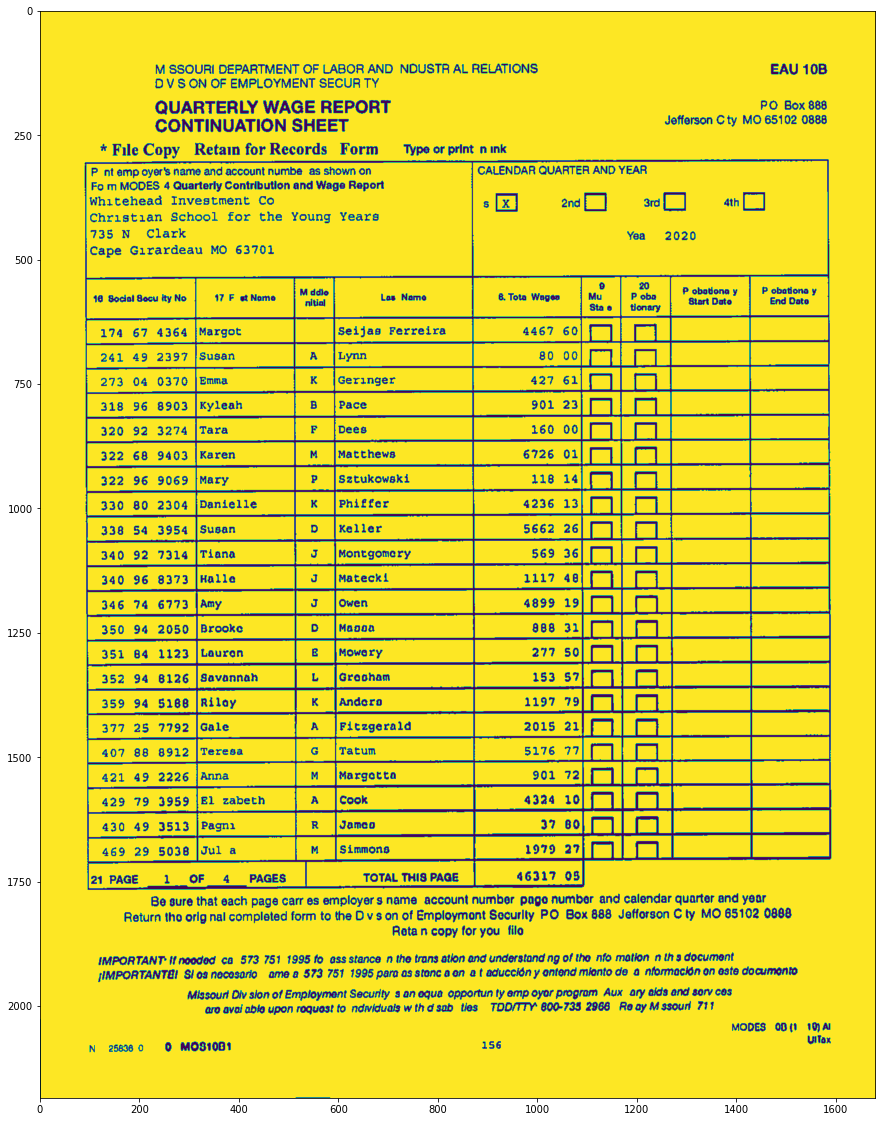

In [107]:
import cv2
import numpy as np
img = cv2.imread("/home/vimal/Documents/table_detect_samples/extraction/input/in/0217026000.jpeg", 0)
_, blackAndWhite = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(blackAndWhite, None, None, None, 8, cv2.CV_32S)
sizes = stats[1:, -1] #get CC_STAT_AREA component
img2 = np.zeros((labels.shape), np.uint8)
for i in range(0, nlabels - 1):
    if sizes[i] >= 50:   #filter small dotted regions
        img2[labels == i + 1] = 255
res = cv2.bitwise_not(img2)
cv2.imwrite("/home/vimal/Documents/table_detect_samples/samples/0217026000.jpeg", res)
plt.figure(figsize=(20,20))
plt.imshow(res)